# Chicago public schools analytic file
## Sandra Tilmon
## 9/20/2023


#### Change log:
Date        Change

10/26/2023 final merged file is Sociome/Data/CPS/School_locations_metrics_0910_2324.csv


**TO DO!!!**
- Fill in missing districts, unit IDs from present data
- Add budget data if delivered

**Data sources**

School addresses: https://www.chicago.gov/city/en/depts/other/dataset/schools.html

School budgets (download only): https://biportal.efs.cps.edu/analytics/saw.dll?Dashboard

School metrics (download only): https://www.cps.edu/about/district-data/metrics/accountability-reports/



# Setup

In [1]:
# !pip install xlrd
# !pip install beautifulsoup4

In [2]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import shape

import matplotlib.pyplot as plt
%matplotlib inline

import json
import os
import requests

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [3]:
# Mount drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
dir = '/content/gdrive/My Drive/Sociome_Folder/Data/'
dir

'/content/gdrive/My Drive/Sociome_Folder/Data/'

# Data

## Shapefiles

### Set CRS

In [5]:
crs = {'init' :'epsg:3435'}

### Census tracts

https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik

In [6]:
# Census tracts

r = requests.get("https://data.cityofchicago.org/resource/74p9-q2aq.json")
r.raise_for_status()

data = r.json()
for d in data:
    d['the_geom'] = shape(d['the_geom'])

tracts_shp = gpd.GeoDataFrame(data).set_geometry('the_geom', crs=crs)

tracts_shp = tracts_shp.drop(columns=['statefp10', 'countyfp10', 'tractce10',	'name10', 'namelsad10',
                                      'notes'])

print(tracts_shp.crs)
print(tracts_shp.info())
tracts_shp.head()

+init=epsg:3435 +type=crs
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   the_geom    801 non-null    geometry
 1   geoid10     801 non-null    object  
 2   commarea    801 non-null    object  
 3   commarea_n  801 non-null    object  
dtypes: geometry(1), object(3)
memory usage: 25.2+ KB
None


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,the_geom,geoid10,commarea,commarea_n
0,"MULTIPOLYGON (((-87.624 41.730, -87.624 41.730...",17031842400,44,44
1,"MULTIPOLYGON (((-87.686 41.823, -87.686 41.823...",17031840300,59,59
2,"MULTIPOLYGON (((-87.629 41.853, -87.629 41.853...",17031841100,34,34
3,"MULTIPOLYGON (((-87.688 41.856, -87.688 41.856...",17031841200,31,31
4,"MULTIPOLYGON (((-87.633 41.874, -87.633 41.874...",17031839000,32,32


<Axes: >

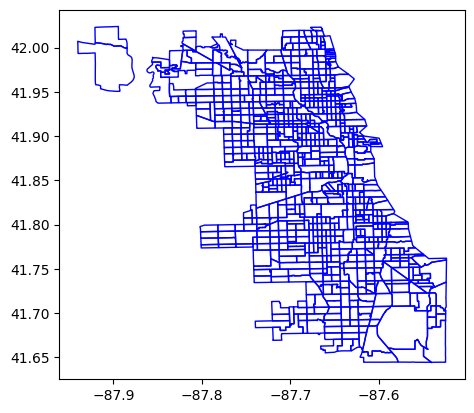

In [7]:
tracts_shp.plot(facecolor="none", edgecolor="blue")

### Wards

https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Wards-2015-2023-/sp34-6z76

In [8]:
# Wards

r = requests.get("https://data.cityofchicago.org/resource/k9yb-bpqx.json")
r.raise_for_status()

data = r.json()
for d in data:
    d['the_geom'] = shape(d['the_geom'])

wards_shp = gpd.GeoDataFrame(data).set_geometry('the_geom', crs=crs)

wards_shp = wards_shp.drop(columns=['shape_area', 'shape_leng'])

print(wards_shp.crs)
print(wards_shp.info())
wards_shp.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


+init=epsg:3435 +type=crs
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   the_geom  50 non-null     geometry
 1   ward      50 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 928.0+ bytes
None


,the_geom,ward
0,"MULTIPOLYGON (((-87.696 41.858, -87.696 41.857...",12
1,"MULTIPOLYGON (((-87.663 41.799, -87.663 41.799...",16
2,"MULTIPOLYGON (((-87.698 41.817, -87.698 41.817...",15
3,"MULTIPOLYGON (((-87.655 41.809, -87.655 41.809...",20
4,"MULTIPOLYGON (((-87.664 42.021, -87.664 42.021...",49


<Axes: >

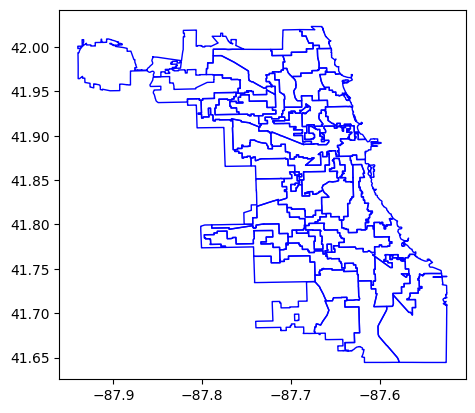

In [9]:
wards_shp.plot(facecolor="none", edgecolor="blue")

## School districts - go to reload

https://data.cityofchicago.org/browse?q=school%20attendance%20boundaries&sortBy=relevance

#### Function

In [ ]:
# ## Districts
# # Stack API calls for multiple years of school districts
# def districty(api_endpoints, years, cats):

#   dataframes=[]

#   for endpoint, year, cat in zip(api_endpoints, years, cats):
#       response = requests.get(endpoint)
#       data=response.json()

#       df = pd.DataFrame(data)
#       df['SchoolYear'] = year
#       df['grade_cat'] = cat
#       dataframes.append(df)

#   combined = pd.concat(dataframes, ignore_index=True)
#   return(combined)

#### Process

##### High school

HS

2009-2010 https://data.cityofchicago.org/resource/up9a-4856.json

2010-2011 https://data.cityofchicago.org/resource/it84-h78n.json

2011-2012 https://data.cityofchicago.org/resource/sp5c-ihm9.json

2012-2013 https://data.cityofchicago.org/resource/s2in-k2mg.json

2013-2014 https://data.cityofchicago.org/resource/kuh7-icv2.json

2014-2015 https://data.cityofchicago.org/resource/94tp-gppc.json

2015-2016 https://data.cityofchicago.org/resource/i8xf-caea.json

2016-2017 https://data.cityofchicago.org/resource/negq-mr8b.json

2017-2018 https://data.cityofchicago.org/resource/juf9-y87b.json

2018-2019 https://data.cityofchicago.org/resource/se26-22jn.json

2019-2020 https://data.cityofchicago.org/resource/d95y-ue9h.json

2020-2021 https://data.cityofchicago.org/resource/da2c-wnfg.json

2021-2022 https://data.cityofchicago.org/d/8vea-73uh.json

2022-2023: https://data.cityofchicago.org/resource/4m25-hh4h.json

2023-2024 https://data.cityofchicago.org/d/a7rq-ymrn.json



In [ ]:
# # Define the APIs and category fields
# api_endpoints = [
#     "https://data.cityofchicago.org/resource/up9a-4856.json",
#     "https://data.cityofchicago.org/resource/it84-h78n.json",
#     "https://data.cityofchicago.org/resource/sp5c-ihm9.json",
#     "https://data.cityofchicago.org/resource/s2in-k2mg.json",
#     "https://data.cityofchicago.org/resource/kuh7-icv2.json",
#     "https://data.cityofchicago.org/resource/94tp-gppc.json",
#     "https://data.cityofchicago.org/resource/i8xf-caea.json",
#     "https://data.cityofchicago.org/resource/negq-mr8b.json",
#     "https://data.cityofchicago.org/resource/juf9-y87b.json",
#     "https://data.cityofchicago.org/resource/se26-22jn.json",
#     "https://data.cityofchicago.org/resource/d95y-ue9h.json",
#     "https://data.cityofchicago.org/resource/da2c-wnfg.json",
#     "https://data.cityofchicago.org/resource/is3f-j4ke.json",
#     "https://data.cityofchicago.org/resource/4m25-hh4h.json",
#     "https://data.cityofchicago.org/resource/gba7-ip5a.json"
# ]

# # Indicator variable for school year of API calls
# years = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014",
#         "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019",
#         "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"
#         ]

# # Elementary, middle, or high school
# cats = ["HS", "HS", "HS", "HS", "HS",
#         "HS", "HS", "HS", "HS", "HS",
#         "HS", "HS", "HS", "HS", "HS"]

In [ ]:
# # Stack the API calls

# HSDistricts = districty(api_endpoints, years, cats)
# print(HSDistricts.info())
# HSDistricts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   the_geom    848 non-null    object
 1   unit_id     250 non-null    object
 2   school_id   793 non-null    object
 3   school_nm   589 non-null    object
 4   school_add  793 non-null    object
 5   grade_cat   848 non-null    object
 6   boundarygr  848 non-null    object
 7   sch_type    589 non-null    object
 8   brd_rpt     81 non-null     object
 9   shape_leng  430 non-null    object
 10  shape_area  430 non-null    object
 11  SchoolYear  848 non-null    object
 12  schoolname  55 non-null     object
 13  schoolid    55 non-null     object
 14  schooladdr  55 non-null     object
 15  sch_year    55 non-null     object
 16  school_nam  204 non-null    object
dtypes: object(17)
memory usage: 112.8+ KB
None


,the_geom,unit_id,school_id,school_nm,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,school_nam
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1110,609682,RICHARDS H S,5009 S LAFLIN ST,HS,"9, 10, 11, 12","District, non-alternative",06-0323-EX10,34152.6622772,34738384.5596,2009-2010,NaN,NaN,NaN,NaN,NaN
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1830,610389,ORR ACADEMY,730 N PULASKI RD,HS,"11, 12","District, non-alternative",NaN,21262.7680409,20688834.4867,2009-2010,NaN,NaN,NaN,NaN,NaN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1830,610389,ORR ACADEMY,730 N PULASKI RD,HS,"9, 10","District, non-alternative",08-0326-EX14,7197.22089403,3054130.19518,2009-2010,NaN,NaN,NaN,NaN,NaN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1490,609725,MORGAN PARK H S,1744 W PRYOR AV,HS,"9, 10, 11, 12","District, non-alternative",NaN,109775.780019,247281790.463,2009-2010,NaN,NaN,NaN,NaN,NaN
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1510,609727,PHILLIPS ACAD,233 E PERSHING RD,HS,"9, 10, 11, 12","District, non-alternative",NaN,120136.533393,238199773.566,2009-2010,NaN,NaN,NaN,NaN,NaN


In [ ]:
# HSDistricts.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    60
2010-2011    65
2011-2012    59
2012-2013    66
2013-2014    62
2014-2015    61
2015-2016    55
2016-2017    57
2017-2018    57
2018-2019    49
2019-2020    53
2020-2021    53
2021-2022    53
2022-2023    49
2023-2024    49
Name: SchoolYear, dtype: int64

##### Elementary

In [ ]:
# # Elementary

# # Define the APIs and category fields
# api_endpoints = [
#     #2009-2010
#     "https://data.cityofchicago.org/resource/j9ch-yf5i.json",
#     #2010-2011 \\\
#     "https://data.cityofchicago.org/resource/d5vw-2kcs.json",
#     #2011-2012
#     "https://data.cityofchicago.org/resource/hr9c-szde.json",
#     #2012-2013
#     "https://data.cityofchicago.org/resource/h8qh-dq5s.json",
#     #2013-2014
#     "https://data.cityofchicago.org/resource/sege-i4a9.json",
#     #2014-2015
#     "https://data.cityofchicago.org/resource/mvv3-naxt.json",
#     #2015-2016
#     "https://data.cityofchicago.org/resource/ppjj-9kn7.json",
#     #2016-2017
#     "https://data.cityofchicago.org/resource/ciye-b75s.json",
#     #2017-2018
#     "https://data.cityofchicago.org/resource/n45m-yz4n.json",
#     #2018-2019
#     "https://data.cityofchicago.org/resource/rau8-hz9p.json",
#     #2019-2020
#     "https://data.cityofchicago.org/resource/abk6-gwwr.json",
#     #2020-2021
#     "https://data.cityofchicago.org/resource/gaak-qc7r.json",
#     #2021-2022
#     "https://data.cityofchicago.org/resource/a3xm-ett9.json",
#     #2022-2023
#     "https://data.cityofchicago.org/resource/d8hd-y5ce.json",
#     #2023-2024
#     "https://data.cityofchicago.org/resource/8k6e-w34s.json"

# ]

# # Indicator variable for school year of API calls
# years = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014",
#         "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019",
#         "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"
#         ]

# # Elementary, middle, or high school
# cats = ["ES", "ES", "ES", "ES", "ES",
#         "ES", "ES", "ES", "ES", "ES",
#         "ES", "ES", "ES", "ES", "ES"]

In [ ]:
# # Stack the API calls

# ESDistricts = districty(api_endpoints, years, cats)
# print(ESDistricts.info())
# ESDistricts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unit_id     1619 non-null   object
 1   school_id   5209 non-null   object
 2   school_nm   3785 non-null   object
 3   the_geom    5565 non-null   object
 4   school_add  5209 non-null   object
 5   grade_cat   5565 non-null   object
 6   boundarygr  5565 non-null   object
 7   sch_type    3785 non-null   object
 8   brd_rpt     1398 non-null   object
 9   shape_leng  2716 non-null   object
 10  shape_area  2716 non-null   object
 11  SchoolYear  5565 non-null   object
 12  schoolname  356 non-null    object
 13  schoolid    356 non-null    object
 14  schooladdr  356 non-null    object
 15  sch_year    356 non-null    object
 16  objectid    357 non-null    object
 17  short_name  1424 non-null   object
dtypes: object(18)
memory usage: 782.7+ KB
None


,unit_id,school_id,school_nm,the_geom,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,short_name
0,4240,610016,KELLOGG,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",9241 S LEAVITT ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",95-0628-ED49,23753.8173193,27983375.1068,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
1,6460,610229,PRITZKER,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",2009 W SCHILLER ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0227-EX14,10562.9344185,5704594.38727,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
2,7150,610290,MAYS,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",838 W MARQUETTE RD,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0123-EX5,10450.0552927,4371715.96027,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
3,5890,610172,SHERMAN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1000 W 52ND ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",86-0806-ED10,14628.080626,11239210.7751,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
4,6600,610242,BRENNEMANN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",4251 N CLARENDON AV,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",05-0323-EX4,32964.9997263,22446065.5736,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ESDistricts.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    404
2010-2011    409
2011-2012    403
2012-2013    403
2013-2014    382
2014-2015    358
2015-2016    356
2016-2017    357
2017-2018    357
2018-2019    356
2019-2020    356
2020-2021    356
2021-2022    356
2022-2023    356
2023-2024    356
Name: SchoolYear, dtype: int64

##### Middle school (more rare)

In [ ]:
# # Define the APIs and category fields
# api_endpoints = [
#     #2009-2010
#     "https://data.cityofchicago.org/resource/8ak6-a24r.json",
#     #2010-2011
#     "https://data.cityofchicago.org/resource/u68q-ccjt.json",
#     #2011-2012
#     "https://data.cityofchicago.org/resource/tb2x-zdvr.json",
#     #2012-2013
#     "https://data.cityofchicago.org/resource/m7h2-r4sq.json",
#     #2013-2014
#     "https://data.cityofchicago.org/resource/t9i2-i6vu.json",
#     #2014-2015
#     "https://data.cityofchicago.org/resource/8dsi-desh.json",
#     #2015-2016
#     "https://data.cityofchicago.org/resource/yc36-jwii.json",
#     #2016-2017
#     "https://data.cityofchicago.org/resource/xq8e-2w28.json",
#     #2017-2018
#     "https://data.cityofchicago.org/resource/i9fz-kj24.json",
#     #2018-2019
#     "https://data.cityofchicago.org/resource/msv2-rz76.json",
#     #2019-2020
#     "https://data.cityofchicago.org/resource/68rq-5b3g.json",
#     #2020-2021
#     "https://data.cityofchicago.org/resource/t5zs-fzmq.json",
#     #2021-2022
#     "https://data.cityofchicago.org/resource/mq3s-cgin.json",
#     #2022-2023
#     "https://data.cityofchicago.org/resource/w9ky-kbav.json",
#     #2023-2024
#     "https://data.cityofchicago.org/resource/njaf-gekg.json"

# ]

# # Indicator variable for school year of API calls
# years = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014",
#         "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019",
#         "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"
#         ]

# # Elementary, middle, or high school
# cats = ["MS", "MS", "MS", "MS", "MS",
#         "MS", "MS", "MS", "MS", "MS",
#         "MS", "MS", "MS", "MS", "MS"]

In [ ]:
# # Stack the API calls

# MSDistricts = districty(api_endpoints, years, cats)
# print(MSDistricts.info())
# MSDistricts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   the_geom    386 non-null    object
 1   unit_id     125 non-null    object
 2   school_id   363 non-null    object
 3   school_nm   272 non-null    object
 4   school_add  363 non-null    object
 5   grade_cat   386 non-null    object
 6   boundarygr  386 non-null    object
 7   sch_type    272 non-null    object
 8   brd_rpt     96 non-null     object
 9   shape_leng  198 non-null    object
 10  shape_area  198 non-null    object
 11  SchoolYear  386 non-null    object
 12  schoolname  23 non-null     object
 13  schoolid    23 non-null     object
 14  schooladdr  23 non-null     object
 15  sch_year    23 non-null     object
 16  objectid    26 non-null     object
 17  school_nam  91 non-null     object
dtypes: object(18)
memory usage: 54.4+ KB
None


,the_geom,unit_id,school_id,school_nm,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,school_nam
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",3520,609938,GARY,3740 W 31ST ST,MS,"3, 4, 5, 6, 7, 8","District, non-alternative",97-0827-ED5,22557.8549663,24435806.6348,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",7610,610329,OROZCO ACADEMY,1940 W 18TH ST,MS,"6, 7, 8","District, non-alternative",NaN,13637.3745494,7575744.46884,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",7520,610321,MARSHALL MIDDLE,3900 N LAWNDALE AV,MS,"7, 8","District, non-alternative",08-0827-EX11,15199.2217921,7920694.44102,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",7520,610321,MARSHALL MIDDLE,3900 N LAWNDALE AV,MS,"7, 8","District, non-alternative",08-0827-EX11,15418.1714222,11679263.1369,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",7520,610321,MARSHALL MIDDLE,3900 N LAWNDALE AV,MS,"7, 8","District, non-alternative",08-0227-ex13,29477.1545524,34888463.7645,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# MSDistricts.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    33
2010-2011    35
2011-2012    29
2012-2013    28
2013-2014    24
2014-2015    23
2015-2016    23
2016-2017    25
2017-2018    26
2018-2019    25
2019-2020    24
2020-2021    24
2021-2022    23
2022-2023    22
2023-2024    22
Name: SchoolYear, dtype: int64

In [ ]:
# MSDistricts['short_name'] = ""

# cols = MSDistricts.columns
# cols

Index(['the_geom', 'unit_id', 'school_id', 'school_nm', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'school_nam', 'short_name'],
      dtype='object')

In [ ]:
# HSDistricts['objectid'] = ""
# HSDistricts['short_name'] = ""

# cols3 = HSDistricts.columns
# cols3

Index(['the_geom', 'unit_id', 'school_id', 'school_nm', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'school_nam', 'objectid', 'short_name'],
      dtype='object')

In [ ]:
# ESDistricts['school_nam'] = ""

# cols2 = ESDistricts.columns
# cols2

Index(['unit_id', 'school_id', 'school_nm', 'the_geom', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'short_name', 'school_nam'],
      dtype='object')

In [ ]:
# collies = cols2
# collies

Index(['unit_id', 'school_id', 'school_nm', 'the_geom', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'short_name', 'school_nam'],
      dtype='object')

In [ ]:
# # Reorder columns

# MSDistricts2 = MSDistricts[collies]
# HSDistricts2 = HSDistricts[collies]

In [ ]:
# cols2 = ESDistricts.columns
# cols2

Index(['unit_id', 'school_id', 'school_nm', 'the_geom', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'short_name', 'school_nam'],
      dtype='object')

In [ ]:
# cols = MSDistricts2.columns
# cols

Index(['unit_id', 'school_id', 'school_nm', 'the_geom', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'short_name', 'school_nam'],
      dtype='object')

In [ ]:
# cols3 = HSDistricts2.columns
# cols3

Index(['unit_id', 'school_id', 'school_nm', 'the_geom', 'school_add',
       'grade_cat', 'boundarygr', 'sch_type', 'brd_rpt', 'shape_leng',
       'shape_area', 'SchoolYear', 'schoolname', 'schoolid', 'schooladdr',
       'sch_year', 'objectid', 'short_name', 'school_nam'],
      dtype='object')

In [ ]:
# # ESDistricts = ESDistricts.reset_index()
# # MSDistricts = MSDistricts.reset_index(drop=True)
# # HSDistricts = HSDistricts.reset_index(drop=True)

# sets = [ESDistricts, MSDistricts2, HSDistricts2]

# Districts = pd.concat(sets, ignore_index=True)
# print(Districts.info())
# Districts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unit_id     1994 non-null   object
 1   school_id   6365 non-null   object
 2   school_nm   4646 non-null   object
 3   the_geom    6799 non-null   object
 4   school_add  6365 non-null   object
 5   grade_cat   6799 non-null   object
 6   boundarygr  6799 non-null   object
 7   sch_type    4646 non-null   object
 8   brd_rpt     1575 non-null   object
 9   shape_leng  3344 non-null   object
 10  shape_area  3344 non-null   object
 11  SchoolYear  6799 non-null   object
 12  schoolname  434 non-null    object
 13  schoolid    434 non-null    object
 14  schooladdr  434 non-null    object
 15  sch_year    434 non-null    object
 16  objectid    1231 non-null   object
 17  short_name  2658 non-null   object
 18  school_nam  5860 non-null   object
dtypes: object(19)
memory usage: 1009.4+ KB
None


,unit_id,school_id,school_nm,the_geom,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,short_name,school_nam
0,4240,610016,KELLOGG,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",9241 S LEAVITT ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",95-0628-ED49,23753.8173193,27983375.1068,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,
1,6460,610229,PRITZKER,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",2009 W SCHILLER ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0227-EX14,10562.9344185,5704594.38727,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,
2,7150,610290,MAYS,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",838 W MARQUETTE RD,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0123-EX5,10450.0552927,4371715.96027,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,
3,5890,610172,SHERMAN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1000 W 52ND ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",86-0806-ED10,14628.080626,11239210.7751,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,
4,6600,610242,BRENNEMANN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",4251 N CLARENDON AV,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",05-0323-EX4,32964.9997263,22446065.5736,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,


In [ ]:
# Districts.tail()

,unit_id,school_id,school_nm,the_geom,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,short_name,school_nam
6794,NaN,609727,NaN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","244 E PERSHING RD CHICAGO, IL 60653",HS,"9, 10, 11, 12",NaN,NaN,NaN,NaN,2023-2024,NaN,NaN,NaN,NaN,,,PHILLIPS HS
6795,NaN,610587,NaN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","555 E 51ST ST CHICAGO, IL 60615",HS,"9, 10, 11, 12",NaN,NaN,NaN,NaN,2023-2024,NaN,NaN,NaN,NaN,,,DYETT ARTS HS
6796,NaN,609756,NaN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","4959 S ARCHER AVE CHICAGO, IL 60632",HS,"9, 10, 11, 12",NaN,NaN,NaN,NaN,2023-2024,NaN,NaN,NaN,NaN,,,CURIE HS
6797,NaN,609735,NaN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","4747 S UNION AVE CHICAGO, IL 60609",HS,"9, 10, 11, 12",NaN,NaN,NaN,NaN,2023-2024,NaN,NaN,NaN,NaN,,,TILDEN HS
6798,NaN,610592,NaN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","6835 S NORMAL BLVD CHICAGO, IL 60621",HS,"9, 10, 11, 12",NaN,NaN,NaN,NaN,2023-2024,NaN,NaN,NaN,NaN,,,ENGLEWOOD STEM HS


Multiple school name fields, all inconsistent.

school_nm, schoolname, short_name, school_nam

In [ ]:
# Districts.school_nm.value_counts(dropna=False).head()

NaN         2153
WARREN        43
CALDWELL      21
DENEEN        21
DIXON         21
Name: school_nm, dtype: int64

In [ ]:
# Districts.short_name.value_counts(dropna=False).head()

NaN          4141
missing      1234
MARQUETTE       8
DETT            8
HOYNE           8
Name: short_name, dtype: int64

In [ ]:
# Districts.schoolname.value_counts(dropna=False).head()

NaN               6365
WARREN               4
HIRSCH HS            3
HOYNE                2
KELVYN PARK HS       2
Name: schoolname, dtype: int64

In [ ]:
# Districts.school_nam.value_counts(dropna=False).head()

NaN               6504
HIRSCH HS           12
WARREN              12
KELVYN PARK HS       8
BOWEN HS             8
Name: school_nam, dtype: int64

In [ ]:
# # Replace NULL school_nm and then by other values

# Districts['SchoolNameCombo']  = Districts['school_nm'].combine_first(
#     Districts['short_name']).combine_first(
#         Districts['schoolname']).combine_first(
#             Districts['school_nam']
#             )

# Districts['SchoolNameCombo'].value_counts(dropna=False)

                            373
WARREN                       48
HOYNE                        30
DENEEN                       26
DIXON                        26
                           ... 
DAISY BATES                   1
SOUTH SHORE MULTIPLEX         1
DAVIS                         1
LITTLE VILLAGE MULTIPLEX      1
ENGLEWOOD STEM HS             1
Name: SchoolNameCombo, Length: 614, dtype: int64

In [ ]:
# # Stragglers

# Districts['SchoolNameCombo'] = np.where(Districts['SchoolNameCombo'] == "",
#                                         Districts['school_nam'],
#                                         Districts['SchoolNameCombo'])

# Districts['SchoolNameCombo'] = np.where(Districts['SchoolNameCombo'].isnull(),
#                                         Districts['schoolname'],
#                                         Districts['SchoolNameCombo'])

# Districts['SchoolNameCombo'].value_counts(dropna=False)

WARREN                       63
HIRSCH HS                    36
DENEEN                       31
DIXON                        31
HOYNE                        30
                             ..
MINOSO                        1
LITTLE VILLAGE MULTIPLEX      1
SOUTH SHORE INTERNATIONAL     1
ZARAGOZA HS                   1
DAVIS                         1
Name: SchoolNameCombo, Length: 615, dtype: int64

In [ ]:
# temp = Dixstricts[Districts['SchoolNameCombo'].isnull()]
# print(temp.shape)
# temp.tail()

(0, 20)


,unit_id,school_id,school_nm,the_geom,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,short_name,school_nam,SchoolNameCombo


In [ ]:
# Districts.head()

,unit_id,school_id,school_nm,the_geom,school_add,grade_cat,boundarygr,sch_type,brd_rpt,shape_leng,shape_area,SchoolYear,schoolname,schoolid,schooladdr,sch_year,objectid,short_name,school_nam,SchoolNameCombo
0,4240,610016,KELLOGG,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",9241 S LEAVITT ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",95-0628-ED49,23753.8173193,27983375.1068,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,,KELLOGG
1,6460,610229,PRITZKER,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",2009 W SCHILLER ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0227-EX14,10562.9344185,5704594.38727,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,,PRITZKER
2,7150,610290,MAYS,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",838 W MARQUETTE RD,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",08-0123-EX5,10450.0552927,4371715.96027,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,,MAYS
3,5890,610172,SHERMAN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",1000 W 52ND ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",86-0806-ED10,14628.080626,11239210.7751,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,,SHERMAN
4,6600,610242,BRENNEMANN,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",4251 N CLARENDON AV,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",05-0323-EX4,32964.9997263,22446065.5736,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,,BRENNEMANN


In [ ]:
# # Multiple school ID fields

# Districts['SchoolIDCombo'] = np.where(Districts['school_id'].isnull(),
#                                         Districts['schoolid'],
#                                         Districts['school_id'])

In [ ]:
# Districts['SchoolIDCombo'].value_counts(dropna=False).head()

610218.0    63
609712.0    45
609887.0    31
609883.0    31
609833.0    31
Name: SchoolIDCombo, dtype: int64

In [ ]:
# Districts.drop(columns=['school_id', 'school_nm', 'brd_rpt',
#                         'schoolname', 'schoolid', 'schooladdr', 'sch_year', 'objectid',
#                         'short_name', 'school_nam'], inplace=True)
#
# Districts = Districts.rename(columns={"the_geom": "District_geom",
#                                       "shape_leng": "District_len",
#                                       "shape_area": "District_area"}
#                              )

# # Reorder
# Districts = Districts[[
#     'SchoolIDCombo', 'unit_id', 'SchoolNameCombo', 'SchoolYear', 'school_add',
#     'grade_cat', 'boundarygr', 'sch_type',
#     'District_geom',  'District_len', 'District_area'
#        ]]
# cols = Districts.columns
# cols

#### Export and reload

In [ ]:
# # Export

# with open(dir + "/CPS/Districts_stacked.csv", 'w') as f:
#   Districts.to_csv(f)

In [ ]:
# Reload

Districts = pd.read_csv(dir + '/CPS/Districts_stacked.csv')

Districts = Districts.drop(columns=['Unnamed: 0'])

cols = Districts.columns
print(cols)

print(Districts.info())
Districts.head()

Index(['SchoolIDCombo', 'unit_id', 'SchoolNameCombo', 'SchoolYear',
       'school_add', 'grade_cat', 'boundarygr', 'sch_type', 'District_geom',
       'District_len', 'District_area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SchoolIDCombo    6799 non-null   float64
 1   unit_id          1994 non-null   float64
 2   SchoolNameCombo  6799 non-null   object 
 3   SchoolYear       6799 non-null   object 
 4   school_add       6365 non-null   object 
 5   grade_cat        6799 non-null   object 
 6   boundarygr       6799 non-null   object 
 7   sch_type         4646 non-null   object 
 8   District_geom    6799 non-null   object 
 9   District_len     3344 non-null   float64
 10  District_area    3344 non-null   float64
dtypes: float64(4), object(7)
memory usage: 584.4+ KB
None


,SchoolIDCombo,unit_id,SchoolNameCombo,SchoolYear,school_add,grade_cat,boundarygr,sch_type,District_geom,District_len,District_area
0,610016.0,4240.0,KELLOGG,2009-2010,9241 S LEAVITT ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",23753.817319,2.798338e+07
1,610229.0,6460.0,PRITZKER,2009-2010,2009 W SCHILLER ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",10562.934419,5.704594e+06
2,610290.0,7150.0,MAYS,2009-2010,838 W MARQUETTE RD,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",10450.055293,4.371716e+06
3,610172.0,5890.0,SHERMAN,2009-2010,1000 W 52ND ST,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",14628.080626,1.123921e+07
4,610242.0,6600.0,BRENNEMANN,2009-2010,4251 N CLARENDON AV,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",32964.999726,2.244607e+07


In [ ]:
# Drop columns with NULLs
Districts2 = Districts.dropna(axis=1)
print(Districts2.info())
Districts2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   the_geom         6799 non-null   object 
 1   grade_cat        6799 non-null   object 
 2   boundarygr       6799 non-null   object 
 3   SchoolYear       6799 non-null   object 
 4   SchoolNameCombo  6799 non-null   object 
 5   SchoolIDCombo    6799 non-null   float64
dtypes: float64(1), object(5)
memory usage: 318.8+ KB
None


,the_geom,grade_cat,boundarygr,SchoolYear,SchoolNameCombo,SchoolIDCombo
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",2009-2010,KELLOGG,610016.0
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",2009-2010,PRITZKER,610229.0
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",2009-2010,MAYS,610290.0
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",2009-2010,SHERMAN,610172.0
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",ES,"K, 1, 2, 3, 4, 5, 6, 7, 8",2009-2010,BRENNEMANN,610242.0


## School addresses - go to reload after GIS
https://data.cityofchicago.org/browse?category=Education&q=%22Chicago+Public+Schools%22&sortBy=relevance
### API

### Function

In [ ]:
# ## ADDRESSES
# # Stack API calls for multiple years of school addresses
# def stacky(api_endpoints, indicators):

#   dataframes=[]

#   for endpoint, indicator in zip(api_endpoints, indicators):
#       response = requests.get(endpoint)
#       data=response.json()

#       df = pd.DataFrame(data)
#       df['SchoolYear'] = indicator
#       dataframes.append(df)

#   combined = pd.concat(dataframes, ignore_index=True)
#   return(combined)

### Process

In [ ]:
# # Define the APIs and category fields
# api_endpoints = [
#     "https://data.cityofchicago.org/resource/3pjd-kfu4.json",
#     "https://data.cityofchicago.org/resource/7xqa-efsz.json",
#     "https://data.cityofchicago.org/resource/anck-gptm.json",
#     "https://data.cityofchicago.org/resource/98wb-ks45.json",
#     "https://data.cityofchicago.org/resource/dgq3-i7xm.json",
#     "https://data.cityofchicago.org/resource/mntu-576c.json",
#     "https://data.cityofchicago.org/resource/mb74-gx3g.json",
#     "https://data.cityofchicago.org/resource/75e5-35kf.json",
#     "https://data.cityofchicago.org/resource/d2h8-2upd.json",
#     "https://data.cityofchicago.org/resource/95e9-uzwt.json",
#     "https://data.cityofchicago.org/resource/tz49-n8ze.json",
#     "https://data.cityofchicago.org/resource/p83k-txqt.json",
#     "https://data.cityofchicago.org/resource/vfmh-nkyk.json",
#     "https://data.cityofchicago.org/resource/gqgn-ekwj.json",
#     "https://data.cityofchicago.org/resource/mv87-m4mi.json"
# ]

# # Indicator variable for school year of API calls
# indicators = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014",
#               "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019",
#               "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"]

In [ ]:
# # Stack the API calls

# addresses = stacky(api_endpoints, indicators)
# print(addresses.shape)
# addresses.head()

(9983, 29)


,school_id,unit_id,school_nm,the_geom,sch_addr,grade_cat,grades,sch_type,x,y,SchoolYear,short_name,address,zip,lat,long,network,governance,phone,geo_network,commarea,ward_15,ald_15,school_typ,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,609971,3800,HARVARD,"{'type': 'Point', 'coordinates': [-87.63269972...",7525 S HARVARD AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6326997237,41.7573189925,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610019,4270,KERSHAW,"{'type': 'Point', 'coordinates': [-87.64093082...",6450 S LOWE AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6409308218,41.7765450692,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,610102,5170,OGLESBY,"{'type': 'Point', 'coordinates': [-87.64550797...",7646 S GREEN ST,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6455079756,41.7547442785,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,610112,5270,PARKER,"{'type': 'Point', 'coordinates': [-87.63534909...",6800 S STEWART AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.635349095,41.7707452934,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610115,5290,PARK MANOR,"{'type': 'Point', 'coordinates': [-87.61150973...",7037 S RHODES AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6115097367,41.7665077505,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Check NULL

# df = addresses

# count = df.isnull().sum()
# percentage = 100 * df.isnull().sum() / len(df)
# types = df.dtypes
# missing_table = pd.concat([count, percentage, types], axis=1)
# missing_table.columns = ['Count', 'Percentage', 'Type']
# missing_table = missing_table.sort_values(by=['Percentage'], ascending=False)
# missing_table.head(40)

,Count,Percentage,Type
school_typ,9324,93.398778,object
unit_id,8627,86.416909,object
:@computed_region_43wa_7qmu,8029,80.426725,object
:@computed_region_bdys_3d7i,8029,80.426725,object
:@computed_region_6mkv_f3dw,8029,80.426725,object
:@computed_region_vrxf_vc4k,8029,80.426725,object
:@computed_region_rpca_8um6,8029,80.426725,object
network,7973,79.865772,object
ald_15,7973,79.865772,object
ward_15,7973,79.865772,object


In [ ]:
# addresses.school_typ.value_counts(dropna=False)

NaN                9324
Traditional         607
Options              42
Specialty             7
Early Childhood       3
Name: school_typ, dtype: int64

In [ ]:
# print(addresses.info())
# print(addresses.SchoolYear.value_counts(dropna=False).sort_index(ascending=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   school_id                    9983 non-null   object
 1   unit_id                      1356 non-null   object
 2   school_nm                    5377 non-null   object
 3   the_geom                     9983 non-null   object
 4   sch_addr                     5377 non-null   object
 5   grade_cat                    9983 non-null   object
 6   grades                       7379 non-null   object
 7   sch_type                     4718 non-null   object
 8   x                            5377 non-null   object
 9   y                            5377 non-null   object
 10  SchoolYear                   9983 non-null   object
 11  short_name                   4606 non-null   object
 12  address                      4606 non-null   object
 13  zip                          2010

In [ ]:
# addresses.head()

,school_id,unit_id,school_nm,the_geom,sch_addr,grade_cat,grades,sch_type,x,y,SchoolYear,short_name,address,zip,lat,long,network,governance,phone,geo_network,commarea,ward_15,ald_15,school_typ,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,609971,3800,HARVARD,"{'type': 'Point', 'coordinates': [-87.63269972...",7525 S HARVARD AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6326997237,41.7573189925,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610019,4270,KERSHAW,"{'type': 'Point', 'coordinates': [-87.64093082...",6450 S LOWE AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6409308218,41.7765450692,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,610102,5170,OGLESBY,"{'type': 'Point', 'coordinates': [-87.64550797...",7646 S GREEN ST,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6455079756,41.7547442785,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,610112,5270,PARKER,"{'type': 'Point', 'coordinates': [-87.63534909...",6800 S STEWART AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.635349095,41.7707452934,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,610115,5290,PARK MANOR,"{'type': 'Point', 'coordinates': [-87.61150973...",7037 S RHODES AVE,ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Elementary School,-87.6115097367,41.7665077505,2009-2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Extract coordinates into separate columns
# addresses['longitude'] = addresses['the_geom'].apply(lambda x: x['coordinates'][0])
# addresses['latitude'] = addresses['the_geom'].apply(lambda x: x['coordinates'][1])

In [ ]:
# addresses.longitude.isna().sum()

0

In [ ]:
# addresses.latitude.isna().sum()

0

In [ ]:
# print(addresses.grades.isna().sum())

# temp = addresses[addresses['grades'].isnull()]
# temp.head()

2604


,school_id,unit_id,school_nm,the_geom,sch_addr,grade_cat,grades,sch_type,x,y,SchoolYear,short_name,address,zip,lat,long,network,governance,phone,geo_network,commarea,ward_15,ald_15,school_typ,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,longitude,latitude
2715,610567,NaN,BRIDGESCAPE ACADEMY OF SOUTH SHORE,"{'type': 'Point', 'coordinates': [-87.58586707...","7037 S STONY ISLAND AVE, 60649",HS,NaN,Alternative/District,-87.5858670775,41.7668209823,2013-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.585867,41.766821
2716,610568,NaN,PATHWAYS EDUCATION HS - AVONDALE,"{'type': 'Point', 'coordinates': [-87.70520611...","3100 W BELMONT AVE, 60618",HS,NaN,Alternative/District,-87.7052061098,41.9394057685,2013-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.705206,41.939406
2717,610569,NaN,OMBUDSMAN 1 HS,"{'type': 'Point', 'coordinates': [-87.70376058...","3214 W 63RD ST, 60629",HS,NaN,Alternative/District,-87.7037605868,41.7790182323,2013-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.703761,41.779018
2718,610570,NaN,OMBUDSMAN 2 HS,"{'type': 'Point', 'coordinates': [-87.80664497...","7500 N HARLEM AVE, 60631",HS,NaN,Alternative/District,-87.8066449735,42.017171092,2013-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.806645,42.017171
2719,610571,NaN,OMBUDSMAN 3 HS,"{'type': 'Point', 'coordinates': [-87.65988177...","5050 N BROADWAY, 60640",HS,NaN,Alternative/District,-87.6598817718,41.9741306201,2013-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.659882,41.974131


In [ ]:
# temp.grade_cat.value_counts(dropna=False)

ES    1914
HS     690
Name: grade_cat, dtype: int64

In [ ]:
# addresses.grade_cat.value_counts(dropna=False)

ES    7330
HS    2569
MS      84
Name: grade_cat, dtype: int64

In [ ]:
# addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   school_id                    9983 non-null   object 
 1   unit_id                      1356 non-null   object 
 2   school_nm                    5377 non-null   object 
 3   the_geom                     9983 non-null   object 
 4   sch_addr                     5377 non-null   object 
 5   grade_cat                    9983 non-null   object 
 6   grades                       7379 non-null   object 
 7   sch_type                     4718 non-null   object 
 8   x                            5377 non-null   object 
 9   y                            5377 non-null   object 
 10  SchoolYear                   9983 non-null   object 
 11  short_name                   4606 non-null   object 
 12  address                      4606 non-null   object 
 13  zip               

In [ ]:
# # Multiple school type fields

# addresses['SchoolTypeCombo'] = np.where(addresses['sch_type'].isnull(),
#                                         addresses['school_typ'],
#                                         addresses['sch_type'])

# addresses['SchoolTypeCombo'].value_counts(dropna=False).head()

NaN                          4606
District, non-alternative    1613
Traditional                  1211
Elementary School             969
Charter                       556
Name: SchoolTypeCombo, dtype: int64

In [ ]:
# # Drop select columns

# addresses = addresses[addresses.columns.drop(list(addresses.filter(regex='computed')))]

# addresses = addresses.drop(columns=['x', 'y', 'sch_type', 'school_typ'])

In [ ]:
# addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_id        9983 non-null   object 
 1   unit_id          1356 non-null   object 
 2   school_nm        5377 non-null   object 
 3   the_geom         9983 non-null   object 
 4   sch_addr         5377 non-null   object 
 5   grade_cat        9983 non-null   object 
 6   grades           7379 non-null   object 
 7   SchoolYear       9983 non-null   object 
 8   short_name       4606 non-null   object 
 9   address          4606 non-null   object 
 10  zip              2010 non-null   object 
 11  lat              4606 non-null   object 
 12  long             4606 non-null   object 
 13  network          2010 non-null   object 
 14  governance       2010 non-null   object 
 15  phone            2010 non-null   object 
 16  geo_network      2010 non-null   object 
 17  commarea      

#### Export csv backup

In [ ]:
# # Export

# with open(dir + "/CPS/School_locations_stacked.csv", 'w') as f:
#   addresses.to_csv(f)

### To GIS

In [ ]:
# # Drop columns with NULLs
# addresses2 = addresses.dropna(axis=1)

# print(addresses2.info())
# addresses2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school_id   9983 non-null   object 
 1   the_geom    9983 non-null   object 
 2   grade_cat   9983 non-null   object 
 3   SchoolYear  9983 non-null   object 
 4   longitude   9983 non-null   float64
 5   latitude    9983 non-null   float64
dtypes: float64(2), object(4)
memory usage: 468.1+ KB
None


,school_id,the_geom,grade_cat,SchoolYear,longitude,latitude
0,609971,"{'type': 'Point', 'coordinates': [-87.63269972...",ES,2009-2010,-87.632700,41.757319
1,610019,"{'type': 'Point', 'coordinates': [-87.64093082...",ES,2009-2010,-87.640931,41.776545
2,610102,"{'type': 'Point', 'coordinates': [-87.64550797...",ES,2009-2010,-87.645508,41.754744
3,610112,"{'type': 'Point', 'coordinates': [-87.63534909...",ES,2009-2010,-87.635349,41.770745
4,610115,"{'type': 'Point', 'coordinates': [-87.61150973...",ES,2009-2010,-87.611510,41.766508


In [ ]:
# add_shp = gpd.GeoDataFrame(addresses2,
#                            geometry=gpd.points_from_xy(addresses2.longitude, addresses2.latitude),
#                            crs=crs)

# add_shp.crs

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- E[east]: Easting (US survey foot)
- N[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.27, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

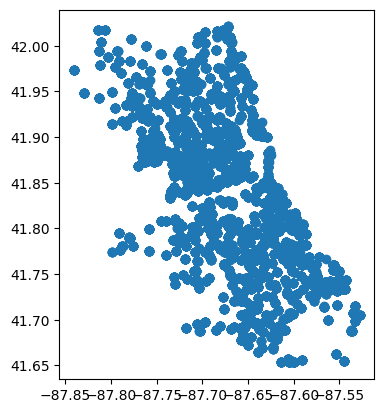

In [ ]:
# add_shp.plot()

### Join to census tract

In [ ]:
# print(tracts_shp.sindex.valid_query_predicates)

# print(add_shp.sindex.valid_query_predicates)

{'crosses', 'intersects', 'covers', 'contains', 'within', 'covered_by', 'touches', 'contains_properly', 'overlaps', None}
{'crosses', 'intersects', 'covers', 'contains', 'within', 'covered_by', 'touches', 'contains_properly', 'overlaps', None}


In [ ]:
# merge1 = gpd.sjoin(add_shp, tracts_shp, how='left', predicate='within')
# print(merge1.shape)

(9983, 11)


In [ ]:
# merge1 = merge1.drop(columns=['index_right'])
# merge1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9983 entries, 0 to 9982
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school_id   9983 non-null   object  
 1   the_geom    9983 non-null   object  
 2   grade_cat   9983 non-null   object  
 3   SchoolYear  9983 non-null   object  
 4   longitude   9983 non-null   float64 
 5   latitude    9983 non-null   float64 
 6   geometry    9983 non-null   geometry
 7   geoid10     9983 non-null   object  
 8   commarea    9983 non-null   object  
 9   commarea_n  9983 non-null   object  
dtypes: float64(2), geometry(1), object(7)
memory usage: 857.9+ KB


### Join to ward

In [ ]:
# print(wards_shp.sindex.valid_query_predicates)

# print(merge1.sindex.valid_query_predicates)

{'crosses', 'intersects', 'covers', 'contains', 'within', 'covered_by', 'touches', 'contains_properly', 'overlaps', None}
{'crosses', 'intersects', 'covers', 'contains', 'within', 'covered_by', 'touches', 'contains_properly', 'overlaps', None}


In [ ]:
# merge2 = gpd.sjoin(merge1, wards_shp, how='left', predicate='within')
# merge2 = merge2.drop(columns=['index_right'])
# print(merge2.shape)

(9983, 11)


In [ ]:
# # Remove geometry

# merge3 = pd.DataFrame(merge2)

# merge3 = merge3.drop(columns=['the_geom', 'geometry'])

# # Standardize uppercase for census tract
# merge3 = merge3.rename(columns={'geoid10': 'GEOID10'})

# print(merge3.info())
# merge3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9982
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school_id   9983 non-null   object 
 1   grade_cat   9983 non-null   object 
 2   SchoolYear  9983 non-null   object 
 3   longitude   9983 non-null   float64
 4   latitude    9983 non-null   float64
 5   GEOID10     9983 non-null   object 
 6   commarea    9983 non-null   object 
 7   commarea_n  9983 non-null   object 
 8   ward        9983 non-null   object 
dtypes: float64(2), object(7)
memory usage: 779.9+ KB
None


,school_id,grade_cat,SchoolYear,longitude,latitude,GEOID10,commarea,commarea_n,ward
0,609971,ES,2009-2010,-87.632700,41.757319,17031691200,69,69,6
1,610019,ES,2009-2010,-87.640931,41.776545,17031680900,68,68,20
2,610102,ES,2009-2010,-87.645508,41.754744,17031710200,71,71,17
3,610112,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6
4,610115,ES,2009-2010,-87.611510,41.766508,17031690500,69,69,6


In [ ]:
# merge3.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2009-2010    668
2010-2011    689
2011-2012    674
2012-2013    681
2013-2014    672
2014-2015    680
2015-2016    679
2016-2017    670
2017-2018    661
2018-2019    659
2019-2020    654
2020-2021    650
2021-2022    647
2022-2023    650
2023-2024    649
Name: SchoolYear, dtype: int64

#### Export and reload

In [ ]:
# with open(dir + "/CPS/School_locations_stacked_ward.csv", 'w') as f:
#   merge3.to_csv(f)

In [ ]:
# Reload

SchoolTractWard = pd.read_csv(dir + '/CPS/School_locations_stacked_ward.csv')
SchoolTractWard = SchoolTractWard.drop(columns=["Unnamed: 0"])

print(SchoolTractWard.info())
SchoolTractWard.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school_id   9983 non-null   int64  
 1   grade_cat   9983 non-null   object 
 2   SchoolYear  9983 non-null   object 
 3   longitude   9983 non-null   float64
 4   latitude    9983 non-null   float64
 5   GEOID10     9983 non-null   int64  
 6   commarea    9983 non-null   int64  
 7   commarea_n  9983 non-null   int64  
 8   ward        9983 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 702.1+ KB
None


,school_id,grade_cat,SchoolYear,longitude,latitude,GEOID10,commarea,commarea_n,ward
0,609971,ES,2009-2010,-87.632700,41.757319,17031691200,69,69,6
1,610019,ES,2009-2010,-87.640931,41.776545,17031680900,68,68,20
2,610102,ES,2009-2010,-87.645508,41.754744,17031710200,71,71,17
3,610112,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6
4,610115,ES,2009-2010,-87.611510,41.766508,17031690500,69,69,6


## School metrics - go to reload

Download: https://www.cps.edu/about/district-data/metrics/accountability-reports/

See also: https://www.cps.edu/about/district-data/metrics/ and https://www.cps.edu/about/district-data/metrics/assessment-reports/

### x Try scraping instead of downloading (needs work)

In [ ]:
# import requests

# url = 'https://www.cps.edu/about/district-data/metrics/accountability-reports/'
# response = requests.get(url)

# if response.status_code == 200:
#     page_content = response.text
# else:
#     print(f"Fail! Status code: {response.status_code}")
#     exit()

In [ ]:
# page_content

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head prefix="og: http://ogp.me/ns#">\r\n    \r\n\r\n<meta name="twitter:card" content="summary_large_image" />\r\n<meta name="og:type" content="article" />\r\n\r\n    <meta property="og:title" content="Accountability Reports | Chicago Public Schools" />\r\n    <meta name="twitter:title" content="Accountability Reports | Chicago Public Schools" />\r\n    <meta property="og:url" content="https://www.cps.edu/about/district-data/metrics/accountability-reports/" />\r\n    <meta name="twitter:site" content="https://www.cps.edu/about/district-data/metrics/accountability-reports/" />\r\n\r\n<title>Accountability Reports | Chicago Public Schools</title>\r\n\r\n    <meta name="description" content="SQRP Ratings and Accountability Status." />\r\n    <meta name="keywords" content="School Quality Rating Policy, SQRP, Ratings, Accountability" />\r\n\r\n\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <meta name="google-trans

In [ ]:
# # Parse the website text

# from bs4 import BeautifulSoup

# soup = BeautifulSoup(page_content, 'html.parser')

# # Collect Excel files
# excel_links = []

# # You need to inspect the HTML structure and find the appropriate tags and attributes
# # that contain the links to Excel files, and then extract them.

# for link in soup.find_all('a'):
#     href = link.get('href')
#     if href:
#         if href.endswith('.xlsx') or href.endswith('.xls'):
#             excel_links.append(href)

# # Print the extracted Excel file links
# for link in excel_links:
#     print(link)

/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/accountability_sqrpratings_2019-2020_schoollevel_v20200305.xls
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/accountability_sqrpratings_2018-2019_schoollevel.xls
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/accountability_sqrpratings_2017-2018_schoollevel.xls
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/accountability_sqrpratings_2016-2017_schoollevel.xls
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/sy15_sqrp_report_cpsedu_final_20151110_full.xlsx
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/sy14_sqrp_report_cpsedu_final_20141204.xlsx
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/2013_performancepolicy_results_03262014.xls
/globalassets/cps-pages/about-cps/district-data/metrics/accountability-reports/historica

In [ ]:
# # Download - *** not grabbing the excel files *** :/

# # *** NEEDS WORK***

# # Download the Excel files to a local directory

# download_dir = dir + '/CPS/downloads'
# os.makedirs(download_dir, exist_ok=True)

# for link in excel_links:
#     file_name = link.split('/')[-1]
#     file_path = os.path.join(download_dir, file_name)
#     file_url = url + link

#     with open(file_path, 'wb') as f:
#         response = requests.get(file_url)
#         if response.status_code == 200:
#             f.write(response.content)
#             print(f"Downloaded: {file_name}")
#         else:
#             print(f"Fail! : {file_name}")

# print("Download completed.")

Downloaded: accountability_sqrpratings_2019-2020_schoollevel_v20200305.xls
Downloaded: accountability_sqrpratings_2018-2019_schoollevel.xls
Downloaded: accountability_sqrpratings_2017-2018_schoollevel.xls
Downloaded: accountability_sqrpratings_2016-2017_schoollevel.xls
Downloaded: sy15_sqrp_report_cpsedu_final_20151110_full.xlsx
Downloaded: sy14_sqrp_report_cpsedu_final_20141204.xlsx
Downloaded: 2013_performancepolicy_results_03262014.xls
Downloaded: historicalayp.xlsx
Download completed.


In [ ]:
# metric_files = []

# for link in excel_links:
#     file_name = link.split('/')[-1]
#     metric_files.append(file_name)

# metric_files

['accountability_sqrpratings_2019-2020_schoollevel_v20200305.xls',
 'accountability_sqrpratings_2018-2019_schoollevel.xls',
 'accountability_sqrpratings_2017-2018_schoollevel.xls',
 'accountability_sqrpratings_2016-2017_schoollevel.xls',
 'sy15_sqrp_report_cpsedu_final_20151110_full.xlsx',
 'sy14_sqrp_report_cpsedu_final_20141204.xlsx',
 '2013_performancepolicy_results_03262014.xls',
 'historicalayp.xlsx']

In [ ]:
# # Define the actual and desired filesnames
# name_mapping = {'metrics1920':'accountability_sqrpratings_2019-2020_schoollevel_v20200305.xls',
#                 "metrics1819" : 'accountability_sqrpratings_2018-2019_schoollevel.xls',
#                 "metrics1718" : 'accountability_sqrpratings_2017-2018_schoollevel.xls',
#                 "metrics1617" : 'accountability_sqrpratings_2016-2017_schoollevel.xls',
#                 "metrics1516" : 'sy15_sqrp_report_cpsedu_final_20151110_full.xlsx',
#                 "metrics1415" : 'sy14_sqrp_report_cpsedu_final_20141204.xlsx',
#                 "metrics_historical" : '2013_performancepolicy_results_03262014.xls' }

# # Indicator variable for school year
# indicators = ["2019-2020", "2018-2019", "2017-2018", "2016-2017", "2015-2016",
#               "2014-2015", "historical"]

### Functions: elem, high, combo, options

In [ ]:
# ## METRICS
# # Stack excel files for school ratings, ELEMENTARY tab only
# def elem(filenames, years):

#   dataframes=[]

#   for filename, year in zip(filenames, years):
#       data = pd.read_excel(dir + 'CPS/raw/' + filename,
#                          sheet_name=("Elem Schools (grds PreK-8 only)"),
#                            dtype=str,
#                            skiprows=4,
#                            header=None,
#                            usecols=(0,1,2,3,4,5,
#                                     6,10,14,
#                                     50,54,
#                                     70,73)
#                            )

#       data.columns=['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                   'AttainReadingPct3to8', 'AttainMathPct3to8',
#                   'AvgDailyAttendance', 'MyVoiceMySchoolScore'
#                   ]

#       data['SchoolYear'] = year
#       data['OriginFile'] = 'accountability_sqrpratings, elem'
#       data['Level'] = 'ES'

#       dataframes.append(data)

#   combined = pd.concat(dataframes, ignore_index=True)
#   return(combined)



# # Stack excel files for school ratings, HIGH SCHOOL tab only
# def high(filenames, years):

#   dataframes=[]

#   for filename, year in zip(filenames, years):
#       data = pd.read_excel(dir + 'CPS/raw/' + filename,
#                          sheet_name=("High Schools (grds 9-12 only)"),
#                            dtype=str,
#                            skiprows=4,
#                            header=None,
#                            usecols=(0,1,2,
#                                     3,4,5,
#                                     6,26,
#                                     30,33,36,
#                                     39,42,45,
#                                     48,51)
#                           )
#       data.columns=['SchoolID', 'SchoolName', 'Network',
#                   'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'ACTGrowthPct', 'ACTAttainPct',
#                   'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                   'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                   'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS'
#                   ]

#       data['SchoolYear'] = year
#       data['OriginFile'] = 'accountability_sqrpratings, HS'
#       data['Level'] = 'HS'


#       dataframes.append(data)

#   combined = pd.concat(dataframes, ignore_index=True)
#   return(combined)



# # Stack excel files for school ratings, COMBO tab only
# def combo(filenames, years):

#   elemframes=[]
#   hsframes=[]

#   for filename, year in zip(filenames, years):
#       data = pd.read_excel(dir + 'CPS/raw/' + filename,
#                          sheet_name=("Combo Schools (grds PreK-12)"),
#                            dtype=str,
#                            skiprows=4,
#                            header=None,
#                            usecols=(0,1,2,
#                                     # elem
#                                     3,

#                                     # hs
#                                     5,

#                                     # both
#                                     8,9,

#                                     # Elem
#                                     10,14,18,
#                                     54,58,
#                                     74,77,

#                                     # High school
#                                     83, 103,
#                                     107,110,113,
#                                     116,119,122,
#                                     125,128)
#                            )
#       data.columns=['SchoolID', 'SchoolName', 'Network',
#                     'ElemSQRPPts',
#                     'HSSQRPPts',
#                     'SQRPRating', 'AccountabilityStatus',

#                     # Elementary

#                     'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                     'AttainReadingPct3to8', 'AttainMathPct3to8',
#                     'AvgDailyAttendance', 'MyVoiceMySchoolScore',

#                     # High school

#                     'ACTGrowthPct', 'ACTAttainPct',
#                     'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                     'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                     'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS'
#                     ]

#       data['SchoolYear'] = year
#       data['OriginFile'] = 'accountability_sqrpratings, combo'

#       #dataframes.append(data)

#       elem = data.loc[:, ('SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                   'AttainReadingPct3to8', 'AttainMathPct3to8',
#                   'AvgDailyAttendance', 'MyVoiceMySchoolScore', 'SchoolYear',
#                   'OriginFile')
#       ]
#       elem['Level'] = 'ES'

#       elemframes.append(elem)

#       hs = data.loc[:, ('SchoolID', 'SchoolName', 'Network',
#                   'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'ACTGrowthPct', 'ACTAttainPct',
#                   'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                   'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                   'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS', 'SchoolYear',
#                   'OriginFile')
#       ]
#       hs['Level'] = 'HS'

#       hsframes.append(hs)

#   elemdf = pd.concat(elemframes, ignore_index=True)
#   hsdf = pd.concat(hsframes, ignore_index=True)
#   return(elemdf, hsdf)




# # Stack excel files for school ratings, OPTIONS tab only
# def options(filenames, years):

#   elemframes=[]
#   hsframes=[]

#   for filename, year in zip(filenames, years):
#       data = pd.read_excel(dir + 'CPS/raw/' + filename,
#                          sheet_name=("Option Schools"),
#                            dtype=str,
#                            skiprows=4,
#                            header=None,
#                            usecols=(0,1,2,
#                                     3,4,5,
#                                     31
#                                     )
#                          )
#       data.columns=['SchoolID', 'SchoolName', 'Network',
#                   'SQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'AvgDailyAttendance'
#                   ]

#       data['MyVoiceMySchoolScore'] = 'Options'

#       data['SchoolYear'] = year
#       data['OriginFile'] = 'accountability_sqrpratings, options'

#       data['Level'] = data['SchoolName'].apply(lambda x: 'HS' if 'HS' in x else 'ES')

#       elem = data[data['Level'] == 'ES']
#       elemframes.append(elem)

#       hs = data[data['Level'] == 'HS']
#       hsframes.append(hs)

#   elemdf = pd.concat(elemframes, ignore_index=True)
#   # Rename
#   elemdf = elemdf.rename(columns={'SQRPPts': 'ElemSQRPPts'})
#   # Add missing columns
#   elemdf['GrowthReadingPct'] = ''
#   elemdf['GrowthMathPct'] = ''
#   elemdf['MeetExceedNationalGrowthPct'] = ''
#   elemdf['AttainReadingPct3to8'] = ''
#   elemdf['AttainMathPct3to8'] = ''
#   # reorder
#   elemdf = elemdf[['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                    'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                    'AttainReadingPct3to8', 'AttainMathPct3to8',
#                    'AvgDailyAttendance', 'MyVoiceMySchoolScore',
#                    'SchoolYear',
#                    'OriginFile', 'Level'
#                    ]]

#   hsdf = pd.concat(hsframes, ignore_index=True)
#   # Rename
#   hsdf = hsdf.rename(columns={'SQRPPts': 'HSSQRPPts', 'AvgDailyAttendance': 'AvgDailyAttendanceHS',
#                               'MyVoiceMySchoolScore': 'MyVoiceMySchoolScoreHS'})
#   # Add missing columns
#   hsdf['ACTGrowthPct'] = ''
#   hsdf['ACTAttainPct'] = ''
#   hsdf['Freshmen'] = ''
#   hsdf['CohortGrad'] = ''
#   hsdf['Dropout1Yr'] = ''
#   hsdf['CollegeEnroll'] = ''
#   hsdf['CollegePersist'] = ''
#   hsdf['AP_IB_CollCredit_CareerCred'] = ''
#   hsdf['MyVoiceMySchoolScoreHS'] = ''

#   # Reorder
#   hsdf = hsdf[['SchoolID', 'SchoolName', 'Network',
#                'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                'ACTGrowthPct', 'ACTAttainPct',
#                'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS',
#                'SchoolYear',
#                'OriginFile', 'Level'
#                ]]
#   return(elemdf, hsdf)

#### Historical file functions (elemhist, hshist)

In [ ]:
# # Extract from historical files
# # Stack excel file TABS for ELEMENTARY

# def elemhist(tab, years):
#   elemframes=[]

#   for tab, year in zip(tabs, years):
#     data = pd.read_excel(dir + "CPS/raw/2013_performancepolicy_results_03262014.xls",
#                          dtype=str,
#                          sheet_name=(tab),
#                          skiprows=2,
#                          header=None,
#                          usecols=(0,2,3,5,7,
#                                   14,24,
#                                   65)
#                          )

#     # No accountability status, no growth, no my voice my school
#     # Different order
#     data.columns=['SchoolID', 'SchoolName', 'Network', 'SQRPRating', 'ElemSQRPPts',
#                   'AttainMathPct3to8', 'AttainReadingPct3to8',
#                   'AvgDailyAttendance'
#                   ]
#     data['SchoolYear'] = year
#     data['OriginFile'] = 'historical, elem, limited metrics'
#     data['Level'] = 'ES'



#     elemframes.append(data)

#   elemdf = pd.concat(elemframes, ignore_index=True)

#   # Add missing columns
#   elemdf['AccountabilityStatus'] = ''
#   elemdf['GrowthReadingPct']  = ''
#   elemdf['GrowthMathPct']  = ''
#   elemdf['MeetExceedNationalGrowthPct']  = ''
#   elemdf['MyVoiceMySchoolScore']  = ''

#   # Reorder
#   elemdf = elemdf[['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                 'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                 'AttainReadingPct3to8', 'AttainMathPct3to8',
#                 'AvgDailyAttendance', 'MyVoiceMySchoolScore',
#                 'SchoolYear',
#                 'OriginFile',  'Level'
#                 ]]
#   return(elemdf)

# # Stack excel file TABS for HIGH SCHOOL

# def hshist(tabs, years):
#   hsframes=[]

#   for tab, year in zip(tabs, years):
#     data = pd.read_excel(dir + "CPS/raw/2013_performancepolicy_results_03262014.xls",
#                          dtype=str,
#                          sheet_name=(tab),
#                          skiprows=2,
#                          header=None,
#                          usecols=(0,2,3,
#                                   5,7,
#                                   24,34,
#                                   44
#                                   )
#                          )
#     # No ACT, no college, no my voice my school
#     data.columns=['SchoolID', 'SchoolName', 'Network',
#                   'SQRPRating', 'HSSQRPPts',
#                   'Dropout1Yr', 'Freshmen',
#                   'AvgDailyAttendanceHS'
#                   ]

#     data['SchoolYear'] = year
#     data['Level'] = 'High school'
#     data['OriginFile'] = 'historical, hs, limited metrics'

#     hsframes.append(data)

#   hsdf = pd.concat(hsframes, ignore_index=True)

#   # Add missing columns
#   hsdf['AccountabilityStatus'] = ''
#   hsdf['ACTGrowthPct']  = ''
#   hsdf['ACTAttainPct']  = ''
#   hsdf['CohortGrad']  = ''
#   hsdf['CollegeEnroll']  = ''
#   hsdf['CollegePersist']  = ''
#   hsdf['AP_IB_CollCredit_CareerCred']  = ''
#   hsdf['CohortGrad']  = ''
#   hsdf['MyVoiceMySchoolScoreHS']  = ''

#   # Reorder
#   hsdf = hsdf[['SchoolID', 'SchoolName', 'Network',
#                 'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                 'ACTGrowthPct', 'ACTAttainPct',
#                 'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                 'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                 'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS',
#                 'SchoolYear',
#                 'OriginFile', 'Level'
#                 ]]

#   return(hsdf)

### Process

In [ ]:
# # Define the filenames and school years - not historical

# metric_files = [
#     "accountability_sqrpratings_2019-2020_schoollevel_v20200305.xls",
#     "accountability_sqrpratings_2018-2019_schoollevel.xls",
#     "accountability_sqrpratings_2017-2018_schoollevel.xls",
#     "accountability_sqrpratings_2016-2017_schoollevel.xls",
#     "sy15_sqrp_report_cpsedu_final_20151110_full.xlsx",
#     "sy14_sqrp_report_cpsedu_final_20141204.xlsx"
# ]

# # Indicator variable for school year of API calls
# indicators = ["2019-2020", "2018-2019", "2017-2018", "2016-2017", "2015-2016",
#               "2014-2015"]

In [ ]:
# el = elem(metric_files, indicators)
# print(el.info())
# el.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     2853 non-null   object
 1   SchoolName                   2853 non-null   object
 2   Network                      2853 non-null   object
 3   ElemSQRPPts                  2791 non-null   object
 4   SQRPRating                   2853 non-null   object
 5   AccountabilityStatus         2853 non-null   object
 6   GrowthReadingPct             2794 non-null   object
 7   GrowthMathPct                2794 non-null   object
 8   MeetExceedNationalGrowthPct  2794 non-null   object
 9   AttainReadingPct3to8         2794 non-null   object
 10  AttainMathPct3to8            2794 non-null   object
 11  AvgDailyAttendance           2837 non-null   object
 12  MyVoiceMySchoolScore         2853 non-null   object
 13  SchoolYear                   2853

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,OriginFile,Level
0,400011,LOCKE A,Charter,3.2,Level 2+,Not Applicable,64,65,55.3,72,65,94.6,Not Enough Data,2019-2020,"accountability_sqrpratings, elem",ES
1,400017,ASPIRA - HAUGAN,Charter,3.7,Level 1,Not Applicable,50,47,52,51,34,96.4,Well Organized,2019-2020,"accountability_sqrpratings, elem",ES
2,400021,CATALYST - CIRCLE ROCK,Charter,3.4,Level 2+,Not Applicable,50,58,52.9,50,35,95.6,Organized,2019-2020,"accountability_sqrpratings, elem",ES
3,400023,CICS - AVALON/SOUTH SHORE,Charter,3.2,Level 2+,Not Applicable,66,39,55.7,79,61,95.1,Moderately Organized,2019-2020,"accountability_sqrpratings, elem",ES
4,400024,CICS - BASIL,Charter,3.3,Level 2+,Not Applicable,78,77,62.4,56,56,93.9,Partially Organized,2019-2020,"accountability_sqrpratings, elem",ES


In [ ]:
# el.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    480
2015-2016    480
2016-2017    477
2017-2018    472
2018-2019    472
2019-2020    472
Name: SchoolYear, dtype: int64

In [ ]:
# hs = high(metric_files, indicators)
# print(hs.info())
# hs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     693 non-null    object
 1   SchoolName                   693 non-null    object
 2   Network                      693 non-null    object
 3   HSSQRPPts                    686 non-null    object
 4   SQRPRating                   693 non-null    object
 5   AccountabilityStatus         693 non-null    object
 6   ACTGrowthPct                 647 non-null    object
 7   ACTAttainPct                 535 non-null    object
 8   Freshmen                     425 non-null    object
 9   CohortGrad                   418 non-null    object
 10  Dropout1Yr                   561 non-null    object
 11  CollegeEnroll                427 non-null    object
 12  CollegePersist               407 non-null    object
 13  AP_IB_CollCredit_CareerCred  447 no

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,OriginFile,Level
0,400022,CHIARTS HS,Contract,3.6,Level 1,Good Standing,56,12,7,2.5,2,NaN,NaN,NaN,3,5,2019-2020,"accountability_sqrpratings, HS",HS
1,400032,CICS - ELLISON HS,Charter,2.4,Level 2,Not Applicable,6,5,5,2.5,NaN,NaN,NaN,NaN,1,3,2019-2020,"accountability_sqrpratings, HS",HS
2,400034,CICS - NORTHTOWN HS,Charter,3.8,Level 1,Not Applicable,84,42,NaN,NaN,3,NaN,35,2.5,2,5,2019-2020,"accountability_sqrpratings, HS",HS
3,400051,NOBLE - NOBLE HS,Charter,4.6,Level 1+,Not Applicable,96,99,NaN,NaN,5,NaN,NaN,NaN,3,5,2019-2020,"accountability_sqrpratings, HS",HS
4,400053,NOBLE - GOLDER HS,Charter,4.1,Level 1+,Not Applicable,99,90,NaN,NaN,5,NaN,NaN,NaN,3,4,2019-2020,"accountability_sqrpratings, HS",HS


In [ ]:
# hs.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    121
2015-2016    115
2016-2017    115
2017-2018    115
2018-2019    115
2019-2020    112
Name: SchoolYear, dtype: int64

##### Combination

In [ ]:
# # Stack the elementary and high school metrics from the combination tab

# elem_combo, hs_combo = combo(metric_files, indicators)
# print(elem_combo.info())
# elem_combo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     158 non-null    object
 1   SchoolName                   158 non-null    object
 2   Network                      158 non-null    object
 3   ElemSQRPPts                  158 non-null    object
 4   SQRPRating                   158 non-null    object
 5   AccountabilityStatus         158 non-null    object
 6   GrowthReadingPct             158 non-null    object
 7   GrowthMathPct                158 non-null    object
 8   MeetExceedNationalGrowthPct  158 non-null    object
 9   AttainReadingPct3to8         158 non-null    object
 10  AttainMathPct3to8            158 non-null    object
 11  AvgDailyAttendance           158 non-null    object
 12  MyVoiceMySchoolScore         156 non-null    object
 13  SchoolYear                   158 no

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,OriginFile,Level
0,400035,CHICAGO MATH & SCIENCE HS,Charter,3.6,Level 1,Not Applicable,36,83,58,50,68,97,Organized,2019-2020,"accountability_sqrpratings, combo",ES
1,400036,CHICAGO VIRTUAL,Charter,2.2,Level 2,Not Applicable,62,16,49.1,55,17,91.2,Partially Organized,2019-2020,"accountability_sqrpratings, combo",ES
2,400052,NOBLE - COMER,Charter,3.5,Level 1,Not Applicable,56,77,59.3,63,54,94.9,Well Organized,2019-2020,"accountability_sqrpratings, combo",ES
3,400061,PERSPECTIVES - LEADERSHIP HS,Charter,3.1,Level 2+,Not Applicable,78,40,58.5,54,25,93.8,Organized,2019-2020,"accountability_sqrpratings, combo",ES
4,400064,PERSPECTIVES - JOSLIN HS,Charter,3.4,Level 2+,Not Applicable,87,53,62.5,67,32,95.7,Not Yet Organized,2019-2020,"accountability_sqrpratings, combo",ES


In [ ]:
# elem_combo.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    25
2015-2016    28
2016-2017    28
2017-2018    25
2018-2019    26
2019-2020    26
Name: SchoolYear, dtype: int64

In [ ]:
# print(hs_combo.info())
# hs_combo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     158 non-null    object
 1   SchoolName                   158 non-null    object
 2   Network                      158 non-null    object
 3   HSSQRPPts                    158 non-null    object
 4   SQRPRating                   158 non-null    object
 5   AccountabilityStatus         158 non-null    object
 6   ACTGrowthPct                 148 non-null    object
 7   ACTAttainPct                 114 non-null    object
 8   Freshmen                     142 non-null    object
 9   CohortGrad                   123 non-null    object
 10  Dropout1Yr                   132 non-null    object
 11  CollegeEnroll                110 non-null    object
 12  CollegePersist               133 non-null    object
 13  AP_IB_CollCredit_CareerCred  135 no

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,Level
0,400035,CHICAGO MATH & SCIENCE HS,Charter,3.9,Level 1,Not Applicable,88,73,.,.,4,.,.,.,3,2,2019-2020,HS
1,400036,CHICAGO VIRTUAL,Charter,2,Level 2,Not Applicable,44,28,.,.,.,.,.,.,1,1,2019-2020,HS
2,400052,NOBLE - COMER,Charter,3.6,Level 1,Not Applicable,96,44,44,2.5,.,.,.,.,2,4,2019-2020,HS
3,400061,PERSPECTIVES - LEADERSHIP HS,Charter,3.1,Level 2+,Not Applicable,63,1,.,.,.,.,.,.,1,5,2019-2020,HS
4,400064,PERSPECTIVES - JOSLIN HS,Charter,3.2,Level 2+,Not Applicable,54,27,28,2.5,.,.,.,.,1,5,2019-2020,HS


In [ ]:
# hs_combo.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    25
2015-2016    28
2016-2017    28
2017-2018    25
2018-2019    26
2019-2020    26
Name: SchoolYear, dtype: int64

##### Options

In [ ]:
# elemopt, hsopt = options(metric_files, indicators)
# print(elemopt.info())
# elemopt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     116 non-null    object
 1   SchoolName                   116 non-null    object
 2   Network                      116 non-null    object
 3   ElemSQRPPts                  116 non-null    object
 4   SQRPRating                   116 non-null    object
 5   AccountabilityStatus         116 non-null    object
 6   GrowthReadingPct             116 non-null    object
 7   GrowthMathPct                116 non-null    object
 8   MeetExceedNationalGrowthPct  116 non-null    object
 9   AttainReadingPct3to8         116 non-null    object
 10  AttainMathPct3to8            116 non-null    object
 11  AvgDailyAttendance           116 non-null    object
 12  MyVoiceMySchoolScore         116 non-null    object
 13  SchoolYear                   116 no

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,OriginFile,Level
0,400124,YCCS - MCKINLEY,Options,3.6,Level 1,Not Applicable,,,,,,67.1,Options,2019-2020,"accountability_sqrpratings, options",ES
1,400125,YCCS - ASPIRA PANTOJA,Options,3.4,Level 2+,Not Applicable,,,,,,66.5,Options,2019-2020,"accountability_sqrpratings, options",ES
2,400126,YCCS - ASSOCIATION HOUSE,Options,4,Level 1+,Not Applicable,,,,,,62,Options,2019-2020,"accountability_sqrpratings, options",ES
3,400127,YCCS - AUSTIN CAREER,Options,4.1,Level 1+,Not Applicable,,,,,,73,Options,2019-2020,"accountability_sqrpratings, options",ES
4,400128,YCCS - CCA ACADEMY,Options,3.7,Level 1,Not Applicable,,,,,,54.2,Options,2019-2020,"accountability_sqrpratings, options",ES


In [ ]:
# elemopt.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    23
2015-2016    20
2016-2017    19
2017-2018    18
2018-2019    18
2019-2020    18
Name: SchoolYear, dtype: int64

In [ ]:
# print(hsopt.info())
# hsopt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     140 non-null    object
 1   SchoolName                   140 non-null    object
 2   Network                      140 non-null    object
 3   HSSQRPPts                    132 non-null    object
 4   SQRPRating                   140 non-null    object
 5   AccountabilityStatus         140 non-null    object
 6   ACTGrowthPct                 140 non-null    object
 7   ACTAttainPct                 140 non-null    object
 8   Freshmen                     140 non-null    object
 9   CohortGrad                   140 non-null    object
 10  Dropout1Yr                   140 non-null    object
 11  CollegeEnroll                140 non-null    object
 12  CollegePersist               140 non-null    object
 13  AP_IB_CollCredit_CareerCred  140 no

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,Level
0,400137,LITTLE BLACK PEARL HS,Options,3.5,Level 1,Good Standing,,,,,,,,,80.2,,2019-2020,HS
1,400147,CAMELOT - EXCEL HS,Options,3.4,Level 2+,Good Standing,,,,,,,,,78.1,,2019-2020,HS
2,400164,INSTITUTO - LOZANO HS,Options,3.3,Level 2+,Not Applicable,,,,,,,,,65.7,,2019-2020,HS
3,400173,PATHWAYS - BRIGHTON PARK HS,Options,3.3,Level 2+,Not Applicable,,,,,,,,,77.1,,2019-2020,HS
4,400175,CAMELOT - EXCEL SOUTHSHORE HS,Options,2.9,Level 2,Provisional Support,,,,,,,,,74.5,,2019-2020,HS


In [ ]:
# hsopt.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2014-2015    18
2015-2016    27
2016-2017    28
2017-2018    25
2018-2019    21
2019-2020    21
Name: SchoolYear, dtype: int64

##### Add in Historical

In [ ]:
# # Define years and tabs

# tabs = [
#     "Elem 2009", "Elem 2010", "Elem 2011", "Elem 2012", "Elem 2013"
#     ]

# # Indicator variable for school year of tabs
# years = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014"]

In [ ]:
# # Stack the elementary tabs

# elhx = elemhist(tabs, years)
# print(elhx.info())
# elhx.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     2513 non-null   object
 1   SchoolName                   2513 non-null   object
 2   Network                      2509 non-null   object
 3   ElemSQRPPts                  2513 non-null   object
 4   SQRPRating                   2513 non-null   object
 5   AccountabilityStatus         2513 non-null   object
 6   GrowthReadingPct             2513 non-null   object
 7   GrowthMathPct                2513 non-null   object
 8   MeetExceedNationalGrowthPct  2513 non-null   object
 9   AttainReadingPct3to8         2473 non-null   object
 10  AttainMathPct3to8            2473 non-null   object
 11  AvgDailyAttendance           2484 non-null   object
 12  MyVoiceMySchoolScore         2513 non-null   object
 13  SchoolYear                   2513

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,OriginFile,Level
0,610212,ALBANY PARK,1,42,0.571,,,,,3,2.4,-0.5,,2009-2010,"historical, elem, limited metrics",ES
1,609789,BARRY,1,42,0.476,,,,,-1.6,-4.4,-0.2,,2009-2010,"historical, elem, limited metrics",ES
2,609798,BELDING,1,42,0.643,,,,,3.7,4.1,-0.2,,2009-2010,"historical, elem, limited metrics",ES
3,609836,CANTY,1,42,0.833,,,,,3,2.7,0.4,,2009-2010,"historical, elem, limited metrics",ES
4,609857,CLEVELAND,1,42,0.667,,,,,7.4,7.4,0.7,,2009-2010,"historical, elem, limited metrics",ES


In [ ]:
# elhx.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2009-2010    495
2010-2011    509
2011-2012    520
2012-2013    518
2013-2014    471
Name: SchoolYear, dtype: int64

In [ ]:
# tabs = [
#     "HS 2009", "HS 2010", "HS 2011", "HS 2012", "High 2013"
#     ]

# # Indicator variable for school year of tabs
# years = ["2009-2010", "2010-2011", "2011-2012", "2012-2013", "2013-2014"]

In [ ]:
# # Stack the high school tabs

# hshx = hshist(tabs, years)
# print(hshx.info())
# hshx.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     731 non-null    object
 1   SchoolName                   731 non-null    object
 2   Network                      722 non-null    object
 3   HSSQRPPts                    731 non-null    object
 4   SQRPRating                   731 non-null    object
 5   AccountabilityStatus         731 non-null    object
 6   ACTGrowthPct                 731 non-null    object
 7   ACTAttainPct                 731 non-null    object
 8   Freshmen                     514 non-null    object
 9   CohortGrad                   731 non-null    object
 10  Dropout1Yr                   679 non-null    object
 11  CollegeEnroll                731 non-null    object
 12  CollegePersist               731 non-null    object
 13  AP_IB_CollCredit_CareerCred  731 no

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,OriginFile,Level
0,609695,AMUNDSEN HS,19,36,0.454,,,,14.5,,-2.8,,,,0,,2009-2010,"historical, hs, limited metrics",High school
1,610501,AUSTIN POLYTECHNICAL HS,19,9,0.333,,,,NaN,,NaN,,,,1,,2009-2010,"historical, hs, limited metrics",High school
2,610370,BEST PRACTICE HS,19,33,0.364,,,,4.9,,-0.2,,,,1,,2009-2010,"historical, hs, limited metrics",High school
3,610244,CLARK HS,19,33,0.404,,,,11,,NaN,,,,0,,2009-2010,"historical, hs, limited metrics",High school
4,609676,DUNBAR HS,19,36,0.278,,,,2.8,,-3.8,,,,0,,2009-2010,"historical, hs, limited metrics",High school


In [ ]:
# hshx.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2009-2010    120
2010-2011    131
2011-2012    155
2012-2013    156
2013-2014    169
Name: SchoolYear, dtype: int64

##### Elementary - stack

In [ ]:
# from pandas.core.frame import frame_sub_kwargs
# # Stack the elementary sheets

# # Combine elementary, options, and combo file
# frames = [el, elem_combo, elemopt, elhx]
# elemetrics = pd.concat(frames, ignore_index=True)

# print(elemetrics.shape)
# print(elemetrics.info())
# elemetrics.head()

(5640, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     5640 non-null   object
 1   SchoolName                   5640 non-null   object
 2   Network                      5636 non-null   object
 3   ElemSQRPPts                  5578 non-null   object
 4   SQRPRating                   5640 non-null   object
 5   AccountabilityStatus         5640 non-null   object
 6   GrowthReadingPct             5581 non-null   object
 7   GrowthMathPct                5581 non-null   object
 8   MeetExceedNationalGrowthPct  5581 non-null   object
 9   AttainReadingPct3to8         5541 non-null   object
 10  AttainMathPct3to8            5541 non-null   object
 11  AvgDailyAttendance           5595 non-null   object
 12  MyVoiceMySchoolScore         5638 non-null   object
 13  SchoolYear            

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,OriginFile,Level
0,400011,LOCKE A,Charter,3.2,Level 2+,Not Applicable,64,65,55.3,72,65,94.6,Not Enough Data,2019-2020,"accountability_sqrpratings, elem",ES
1,400017,ASPIRA - HAUGAN,Charter,3.7,Level 1,Not Applicable,50,47,52,51,34,96.4,Well Organized,2019-2020,"accountability_sqrpratings, elem",ES
2,400021,CATALYST - CIRCLE ROCK,Charter,3.4,Level 2+,Not Applicable,50,58,52.9,50,35,95.6,Organized,2019-2020,"accountability_sqrpratings, elem",ES
3,400023,CICS - AVALON/SOUTH SHORE,Charter,3.2,Level 2+,Not Applicable,66,39,55.7,79,61,95.1,Moderately Organized,2019-2020,"accountability_sqrpratings, elem",ES
4,400024,CICS - BASIL,Charter,3.3,Level 2+,Not Applicable,78,77,62.4,56,56,93.9,Partially Organized,2019-2020,"accountability_sqrpratings, elem",ES


In [ ]:
# # Save elementary

# with open(dir + "/CPS/Elem_metrics_stacked.csv", 'w') as f:
#   elemetrics.to_csv(f)

In [ ]:
# # Reload

# elemetrics = pd.read_csv(dir + '/CPS/Elem_metrics_stacked.csv')
# elemetrics = elemetrics.drop(columns=["Unnamed: 0"])

# print(elemetrics.info())
# elemetrics.head()

##### High school - stack

In [ ]:
# # Combine hs, options, combo, and hx file file
# frames = [hs, hs_combo, hsopt, hshx]
# highmetrics = pd.concat(frames, ignore_index=True)

# print(highmetrics.shape)
# print(highmetrics.info())
# highmetrics.head()

(1722, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SchoolID                     1722 non-null   object
 1   SchoolName                   1722 non-null   object
 2   Network                      1713 non-null   object
 3   HSSQRPPts                    1707 non-null   object
 4   SQRPRating                   1722 non-null   object
 5   AccountabilityStatus         1722 non-null   object
 6   ACTGrowthPct                 1666 non-null   object
 7   ACTAttainPct                 1520 non-null   object
 8   Freshmen                     1221 non-null   object
 9   CohortGrad                   1412 non-null   object
 10  Dropout1Yr                   1512 non-null   object
 11  CollegeEnroll                1408 non-null   object
 12  CollegePersist               1411 non-null   object
 13  AP_IB_CollCredit_Caree

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,OriginFile,Level
0,400022,CHIARTS HS,Contract,3.6,Level 1,Good Standing,56,12,7,2.5,2,NaN,NaN,NaN,3,5,2019-2020,"accountability_sqrpratings, HS",HS
1,400032,CICS - ELLISON HS,Charter,2.4,Level 2,Not Applicable,6,5,5,2.5,NaN,NaN,NaN,NaN,1,3,2019-2020,"accountability_sqrpratings, HS",HS
2,400034,CICS - NORTHTOWN HS,Charter,3.8,Level 1,Not Applicable,84,42,NaN,NaN,3,NaN,35,2.5,2,5,2019-2020,"accountability_sqrpratings, HS",HS
3,400051,NOBLE - NOBLE HS,Charter,4.6,Level 1+,Not Applicable,96,99,NaN,NaN,5,NaN,NaN,NaN,3,5,2019-2020,"accountability_sqrpratings, HS",HS
4,400053,NOBLE - GOLDER HS,Charter,4.1,Level 1+,Not Applicable,99,90,NaN,NaN,5,NaN,NaN,NaN,3,4,2019-2020,"accountability_sqrpratings, HS",HS


In [ ]:
# # Save high school

# with open(dir + "/CPS/HS_metrics_stacked1424.csv", 'w') as f:
#   highmetrics.to_csv(f)

In [ ]:
# # Reload

# highmetrics = pd.read_csv(dir + '/CPS/HS_metrics_stacked1424.csv')
# highmetrics = highmetrics.drop(columns=["Unnamed: 0"])

# print(highmetrics.info())
# highmetrics.head()

In [ ]:
# hscols = highmetrics.columns.tolist()
# hscols

['SchoolID',
 'SchoolName',
 'Network',
 'HSSQRPPts',
 'SQRPRating',
 'AccountabilityStatus',
 'ACTGrowthPct',
 'ACTAttainPct',
 'Freshmen',
 'CohortGrad',
 'Dropout1Yr',
 'CollegeEnroll',
 'CollegePersist',
 'AP_IB_CollCredit_CareerCred',
 'AvgDailyAttendanceHS',
 'MyVoiceMySchoolScoreHS',
 'SchoolYear',
 'OriginFile',
 'Level']

#### All: Common metrics

In [ ]:
# # Stack common elementary and high school common metrics

# ## Elementary
# elemin = elemetrics[['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                      'AvgDailyAttendance', 'MyVoiceMySchoolScore',	'SchoolYear', 'Level',
#                      'OriginFile']]
# ### Rename - had separate names b/c of combo file
# elemin = elemin.rename(columns={"ElemSQRPPts": "SQRPPts"})

# ## High school
# hsmin = highmetrics[['SchoolID', 'SchoolName', 'Network', 'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                      'AvgDailyAttendanceHS','MyVoiceMySchoolScoreHS', 'SchoolYear', 'Level',
#                      'OriginFile']]
# ### Rename - had separate names b/c of combo file
# hsmin = hsmin.rename(columns={"HSSQRPPts": "SQRPPts", 'AvgDailyAttendanceHS': "AvgDailyAttendance",
#                              'MyVoiceMySchoolScoreHS': 'MyVoiceMySchoolScore'})

# ## Stack
# allmetrics = pd.concat([elemin, hsmin], ignore_index=True)

In [ ]:
# print(allmetrics.info())
# allmetrics.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7362 entries, 0 to 7361
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SchoolID              7362 non-null   object
 1   SchoolName            7362 non-null   object
 2   Network               7349 non-null   object
 3   SQRPPts               7285 non-null   object
 4   SQRPRating            7362 non-null   object
 5   AccountabilityStatus  4849 non-null   object
 6   AvgDailyAttendance    7284 non-null   object
 7   MyVoiceMySchoolScore  4812 non-null   object
 8   SchoolYear            7362 non-null   object
 9   Level                 7362 non-null   object
 10  OriginFile            7362 non-null   object
dtypes: object(11)
memory usage: 632.8+ KB
None


,SchoolID,SchoolName,Network,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,Level,OriginFile
7357,400142,YCCS CHTR-VIRTUAL,Network - Charter/Contract,0,Not Enough Data,,74.6,,2013-2014,High school,"historical, hs, limited metrics"
7358,400143,YCCS CHTR-WEST TOWN,Network - Charter/Contract,1,Not Enough Data,,85,,2013-2014,High school,"historical, hs, limited metrics"
7359,400144,YCCS CHTR-WESTSIDE HOLISTIC,Network - Charter/Contract,0,Not Enough Data,,77.3,,2013-2014,High school,"historical, hs, limited metrics"
7360,400130,YCCS CHTR-YOUTH DEVELOPMENT,Network - Charter/Contract,0,Not Enough Data,,65.1,,2013-2014,High school,"historical, hs, limited metrics"
7361,400087,YNG WOMEN-CHTR CAMPUS,Network - Charter/Contract,13.333,Level 2,,91.8,,2013-2014,High school,"historical, hs, limited metrics"


In [ ]:
# allmetrics.SchoolYear.value_counts(dropna=False).sort_index(ascending=True)

2009-2010    615
2010-2011    640
2011-2012    675
2012-2013    674
2013-2014    640
2014-2015    692
2015-2016    698
2016-2017    695
2017-2018    680
2018-2019    678
2019-2020    675
Name: SchoolYear, dtype: int64

### Export and reload

In [ ]:
# # # Save all metrics (elementary and high school)

# allmetrics['school_id'] = allmetrics['SchoolID']

# with open(dir + "/CPS/ALL_metrics_stacked0920.csv", 'w') as f:
#   allmetrics.to_csv(f)

In [ ]:
# Reload

allmetrics = pd.read_csv(dir + 'CPS/ALL_metrics_stacked0920.csv')
allmetrics = allmetrics.drop(columns=["Unnamed: 0", 'SchoolID'])
print(allmetrics.info())
allmetrics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7362 entries, 0 to 7361
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SchoolName            7362 non-null   object
 1   Network               7349 non-null   object
 2   SQRPPts               7285 non-null   object
 3   SQRPRating            7362 non-null   object
 4   AccountabilityStatus  4118 non-null   object
 5   AvgDailyAttendance    7284 non-null   object
 6   MyVoiceMySchoolScore  3941 non-null   object
 7   SchoolYear            7362 non-null   object
 8   Level                 7362 non-null   object
 9   OriginFile            7362 non-null   object
 10  school_id             7362 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 632.8+ KB
None


,SchoolName,Network,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,Level,OriginFile,school_id
0,LOCKE A,Charter,3.2,Level 2+,Not Applicable,94.6,Not Enough Data,2019-2020,ES,"accountability_sqrpratings, elem",400011
1,ASPIRA - HAUGAN,Charter,3.7,Level 1,Not Applicable,96.4,Well Organized,2019-2020,ES,"accountability_sqrpratings, elem",400017
2,CATALYST - CIRCLE ROCK,Charter,3.4,Level 2+,Not Applicable,95.6,Organized,2019-2020,ES,"accountability_sqrpratings, elem",400021
3,CICS - AVALON/SOUTH SHORE,Charter,3.2,Level 2+,Not Applicable,95.1,Moderately Organized,2019-2020,ES,"accountability_sqrpratings, elem",400023
4,CICS - BASIL,Charter,3.3,Level 2+,Not Applicable,93.9,Partially Organized,2019-2020,ES,"accountability_sqrpratings, elem",400024


## Join school addresses, metrics, and districts -- go to reload

In [ ]:
# total_merge = SchoolTractWard.merge(allmetrics, on=['school_id', 'SchoolYear'], how='left', indicator=True)

# R1 = total_merge[total_merge['_merge']=='both']
# R2 = total_merge[total_merge['_merge']=='left_only']
# # R3 = total_merge[total_merge['_merge']=='right_only']

# total_merge = total_merge.drop(columns="_merge")

# R1 = R1.drop(columns="_merge")
# R2 = R2.drop(columns="_merge")
# # R3 = R3.drop(columns="_merge")

# print(R1.shape)
# print(R2.shape)
# # print(R3.shape)

(7320, 18)
(2823, 18)


In [ ]:
# print(total_merge.info())
# total_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 0 to 10142
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_id             10143 non-null  int64  
 1   grade_cat             10143 non-null  object 
 2   SchoolYear            10143 non-null  object 
 3   longitude             10143 non-null  float64
 4   latitude              10143 non-null  float64
 5   GEOID10               10143 non-null  int64  
 6   commarea              10143 non-null  int64  
 7   commarea_n            10143 non-null  int64  
 8   ward                  10143 non-null  int64  
 9   SchoolName            7320 non-null   object 
 10  Network               7315 non-null   object 
 11  SQRPPts               7245 non-null   object 
 12  SQRPRating            7320 non-null   object 
 13  AccountabilityStatus  4088 non-null   object 
 14  AvgDailyAttendance    7243 non-null   object 
 15  MyVoiceMySchoolScor

,school_id,grade_cat,SchoolYear,longitude,latitude,GEOID10,commarea,commarea_n,ward,SchoolName,Network,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,Level,OriginFile
0,609971,ES,2009-2010,-87.632700,41.757319,17031691200,69,69,6,HARVARD,28,42,0.595,NaN,4,NaN,ES,"historical, elem, limited metrics"
1,610019,ES,2009-2010,-87.640931,41.776545,17031680900,68,68,20,KERSHAW,14,42,0.405,NaN,1.5,NaN,ES,"historical, elem, limited metrics"
2,610102,ES,2009-2010,-87.645508,41.754744,17031710200,71,71,17,OGLESBY,14,42,0.167,NaN,-1.1,NaN,ES,"historical, elem, limited metrics"
3,610112,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6,PARKER,14,42,0.19,NaN,0.3,NaN,ES,"historical, elem, limited metrics"
4,610115,ES,2009-2010,-87.611510,41.766508,17031690500,69,69,6,PARK MANOR,14,42,0.357,NaN,-1.7,NaN,ES,"historical, elem, limited metrics"


In [ ]:
# R1.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    615
2010-2011    654
2011-2012    660
2012-2013    664
2013-2014    639
2014-2015    689
2015-2016    698
2016-2017    683
2017-2018    676
2018-2019    675
2019-2020    667
Name: SchoolYear, dtype: int64

In [ ]:
# R2.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010     53
2010-2011     35
2011-2012     14
2012-2013     20
2013-2014     33
2014-2015     17
2015-2016      9
2016-2017     13
2017-2018     10
2018-2019     10
2019-2020     13
2020-2021    650
2021-2022    647
2022-2023    650
2023-2024    649
Name: SchoolYear, dtype: int64

## Double-checked: No metrics available after 2019-2020

In [ ]:
# total_merge.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    668
2010-2011    689
2011-2012    674
2012-2013    684
2013-2014    672
2014-2015    706
2015-2016    707
2016-2017    696
2017-2018    686
2018-2019    685
2019-2020    680
2020-2021    650
2021-2022    647
2022-2023    650
2023-2024    649
Name: SchoolYear, dtype: int64

In [ ]:
# # Check NULL

# df = total_merge

# count = df.isnull().sum()
# percentage = 100 * df.isnull().sum() / len(df)
# types = df.dtypes
# missing_table = pd.concat([count, percentage, types], axis=1)
# missing_table.columns = ['Count', 'Percentage', 'Type']
# missing_table = missing_table.sort_values(by=['Percentage'], ascending=False)
# missing_table.head(40)

,Count,Percentage,Type
MyVoiceMySchoolScore,6223,61.352657,object
AccountabilityStatus,6055,59.696342,object
AvgDailyAttendance,2900,28.591147,object
SQRPPts,2898,28.571429,object
Network,2828,27.881297,object
Level,2823,27.832002,object
SchoolName,2823,27.832002,object
SQRPRating,2823,27.832002,object
school_id,0,0.000000,int64
grade_cat,0,0.000000,object


In [ ]:
# print(total_merge.info())
# total_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10143 entries, 0 to 10142
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   school_id             10143 non-null  int64  
 1   grade_cat             10143 non-null  object 
 2   SchoolYear            10143 non-null  object 
 3   longitude             10143 non-null  float64
 4   latitude              10143 non-null  float64
 5   GEOID10               10143 non-null  int64  
 6   commarea              10143 non-null  int64  
 7   commarea_n            10143 non-null  int64  
 8   ward                  10143 non-null  int64  
 9   SchoolName            7320 non-null   object 
 10  Network               7315 non-null   object 
 11  SQRPPts               7245 non-null   object 
 12  SQRPRating            7320 non-null   object 
 13  AccountabilityStatus  4088 non-null   object 
 14  AvgDailyAttendance    7243 non-null   object 
 15  MyVoiceMySchoolScor

,school_id,grade_cat,SchoolYear,longitude,latitude,GEOID10,commarea,commarea_n,ward,SchoolName,Network,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,Level
0,609971,ES,2009-2010,-87.632700,41.757319,17031691200,69,69,6,HARVARD,28,42,0.595,NaN,4,NaN,Elementary
1,610019,ES,2009-2010,-87.640931,41.776545,17031680900,68,68,20,KERSHAW,14,42,0.405,NaN,1.5,NaN,Elementary
2,610102,ES,2009-2010,-87.645508,41.754744,17031710200,71,71,17,OGLESBY,14,42,0.167,NaN,-1.1,NaN,Elementary
3,610112,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6,PARKER,14,42,0.19,NaN,0.3,NaN,Elementary
4,610115,ES,2009-2010,-87.611510,41.766508,17031690500,69,69,6,PARK MANOR,14,42,0.357,NaN,-1.7,NaN,Elementary


In [ ]:
# total_merge['school_id'] = total_merge['school_id'].astype(np.float64)
# Districts['school_id'] = Districts['SchoolIDCombo'].astype(np.float64)

In [ ]:
# # Join to school district

# total_merge2 = total_merge.merge(Districts, on=['school_id', 'SchoolYear', 'grade_cat'], how='left', indicator=True)

# R4 = total_merge2[total_merge2['_merge']=='both']
# R5 = total_merge2[total_merge2['_merge']=='left_only']
# # R6 = total_merge2[total_merge2['_merge']=='right_only']

# R4 = R4.drop(columns="_merge")
# R5 = R5.drop(columns="_merge")
# # R6 = R6.drop(columns="_merge")

# print(R4.shape)
# print(R5.shape)
# # print(R6.shape)

(6515, 27)
(3865, 27)


In [ ]:
# total_merge2.head()

,school_id,grade_cat,SchoolYear,longitude,latitude,GEOID10,commarea,commarea_n,ward,SchoolName,Network,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,Level,OriginFile,SchoolIDCombo,unit_id,SchoolNameCombo,school_add,boundarygr,sch_type,District_geom,District_len,District_area,_merge
0,609971.0,ES,2009-2010,-87.632700,41.757319,17031691200,69,69,6,HARVARD,28,42,0.595,NaN,4,NaN,ES,"historical, elem, limited metrics",609971.0,3800.0,HARVARD,7525 S HARVARD AV,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",17107.781835,1.184031e+07,both
1,610019.0,ES,2009-2010,-87.640931,41.776545,17031680900,68,68,20,KERSHAW,14,42,0.405,NaN,1.5,NaN,ES,"historical, elem, limited metrics",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,610102.0,ES,2009-2010,-87.645508,41.754744,17031710200,71,71,17,OGLESBY,14,42,0.167,NaN,-1.1,NaN,ES,"historical, elem, limited metrics",610102.0,5170.0,OGLESBY,7646 S GREEN ST,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",14270.235591,8.249756e+06,both
3,610112.0,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6,PARKER,14,42,0.19,NaN,0.3,NaN,ES,"historical, elem, limited metrics",610112.0,5270.0,PARKER,6800 S STEWART AV,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",13743.115324,7.696067e+06,both
4,610112.0,ES,2009-2010,-87.635349,41.770745,17031681200,68,68,6,PARKER,14,42,0.19,NaN,0.3,NaN,ES,"historical, elem, limited metrics",610112.0,5270.0,PARKER,6800 S STEWART AV,K,"District, non-alternative","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",5566.795332,1.616534e+06,both


In [ ]:
# total_merge2.SchoolYear.value_counts().sort_index(ascending=True)

2009-2010    694
2010-2011    733
2011-2012    693
2012-2013    710
2013-2014    697
2014-2015    719
2015-2016    716
2016-2017    706
2017-2018    696
2018-2019    693
2019-2020    691
2020-2021    661
2021-2022    658
2022-2023    657
2023-2024    656
Name: SchoolYear, dtype: int64

In [ ]:
# # Check NULL

# df = total_merge2

# count = df.isnull().sum()
# percentage = 100 * df.isnull().sum() / len(df)
# types = df.dtypes
# missing_table = pd.concat([count, percentage, types], axis=1)
# missing_table.columns = ['Count', 'Percentage', 'Type']
# missing_table = missing_table.sort_values(by=['Percentage'], ascending=False)
# missing_table.head(40)

,Count,Percentage,Type
unit_id,8437,81.281310,float64
MyVoiceMySchoolScore,6399,61.647399,object
AccountabilityStatus,6231,60.028902,object
sch_type,5909,56.926782,object
school_add,4281,41.242775,object
SchoolIDCombo,3865,37.235067,float64
SchoolNameCombo,3865,37.235067,object
boundarygr,3865,37.235067,object
the_geom,3865,37.235067,object
AvgDailyAttendance,2936,28.285164,object


### Export and reload final analytic file
Note: Systematic missings

In [ ]:
# # Save

# with open(dir + "/CPS/School_locations_metrics_0910_2324.csv", 'w') as f:
#   total_merge2.to_csv(f)

In [10]:
# Reload

SchoolsFinal = pd.read_csv(dir + '/CPS/School_locations_metrics_0910_2324.csv')
SchoolsFinal = SchoolsFinal.drop(columns=["Unnamed: 0"])

# Reorder
SchoolsFinal2 = SchoolsFinal[[
    # School description
    'SchoolIDCombo', 'unit_id', 'SchoolNameCombo', 'grade_cat', 'Level', 'boundarygr', 'sch_type', 'Network',

    # School locations
    'school_add', 'longitude', 'latitude', 'GEOID10', 'commarea', 'commarea_n', 'ward', 'District_geom', 'District_len', 'District_area',

    # Yearly metrics
    'SchoolYear', 'SQRPPts', 'SQRPRating', 'AccountabilityStatus', 'AvgDailyAttendance', 'MyVoiceMySchoolScore',

    # Original file affects missingness patterns
    'OriginFile'

                              ]]

print(SchoolsFinal2.info())
cols = SchoolsFinal2.columns
print(cols)
SchoolsFinal2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SchoolIDCombo         6515 non-null   float64
 1   unit_id               1943 non-null   float64
 2   SchoolNameCombo       6515 non-null   object 
 3   grade_cat             10380 non-null  object 
 4   Level                 7521 non-null   object 
 5   boundarygr            6515 non-null   object 
 6   sch_type              4471 non-null   object 
 7   Network               7516 non-null   object 
 8   school_add            6099 non-null   object 
 9   longitude             10380 non-null  float64
 10  latitude              10380 non-null  float64
 11  GEOID10               10380 non-null  int64  
 12  commarea              10380 non-null  int64  
 13  commarea_n            10380 non-null  int64  
 14  ward                  10380 non-null  int64  
 15  District_geom      

,SchoolIDCombo,unit_id,SchoolNameCombo,grade_cat,Level,boundarygr,sch_type,Network,school_add,longitude,latitude,GEOID10,commarea,commarea_n,ward,District_geom,District_len,District_area,SchoolYear,SQRPPts,SQRPRating,AccountabilityStatus,AvgDailyAttendance,MyVoiceMySchoolScore,OriginFile
0,609971.0,3800.0,HARVARD,ES,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",28,7525 S HARVARD AV,-87.632700,41.757319,17031691200,69,69,6,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",17107.781835,1.184031e+07,2009-2010,42,0.595,NaN,4,NaN,"historical, elem, limited metrics"
1,NaN,NaN,NaN,ES,ES,NaN,NaN,14,NaN,-87.640931,41.776545,17031680900,68,68,20,NaN,NaN,NaN,2009-2010,42,0.405,NaN,1.5,NaN,"historical, elem, limited metrics"
2,610102.0,5170.0,OGLESBY,ES,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",14,7646 S GREEN ST,-87.645508,41.754744,17031710200,71,71,17,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",14270.235591,8.249756e+06,2009-2010,42,0.167,NaN,-1.1,NaN,"historical, elem, limited metrics"
3,610112.0,5270.0,PARKER,ES,ES,"K, 1, 2, 3, 4, 5, 6, 7, 8","District, non-alternative",14,6800 S STEWART AV,-87.635349,41.770745,17031681200,68,68,6,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",13743.115324,7.696067e+06,2009-2010,42,0.19,NaN,0.3,NaN,"historical, elem, limited metrics"
4,610112.0,5270.0,PARKER,ES,ES,K,"District, non-alternative",14,6800 S STEWART AV,-87.635349,41.770745,17031681200,68,68,6,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...",5566.795332,1.616534e+06,2009-2010,42,0.19,NaN,0.3,NaN,"historical, elem, limited metrics"


In [ ]:
cols = SchoolsFinal.columns
cols

Index(['school_id', 'grade_cat', 'SchoolYear', 'longitude', 'latitude',
       'GEOID10', 'commarea', 'commarea_n', 'ward', 'SchoolName', 'Network',
       'SQRPPts', 'SQRPRating', 'AccountabilityStatus', 'AvgDailyAttendance',
       'MyVoiceMySchoolScore', 'Level', 'OriginFile', 'SchoolIDCombo',
       'unit_id', 'SchoolNameCombo', 'school_add', 'boundarygr', 'sch_type',
       'District_geom', 'District_len', 'District_area', '_merge'],
      dtype='object')

# Flotsam, trials

## School budget -- limited years -- Data Request DR23-079 submitted 9/25/2023

Download only, current budget year only: https://biportal.efs.cps.edu/analytics/saw.dll?Dashboard

Still trying to locate prior years - requested via DR23-079; excluding from table for now.


In [ ]:
budget = pd.read_csv(dir + "CPS/BudgetBook.csv", encoding='latin-1')
print(budget.info())
budget.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538916 entries, 0 to 538915
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   UNIT                         538916 non-null  object 
 1   Unit Name                    538916 non-null  object 
 2   Fund Grant                   538916 non-null  object 
 3   Fund Grant Name              538916 non-null  object 
 4   Account                      538916 non-null  object 
 5   Account Name                 538916 non-null  object 
 6   Program                      538916 non-null  object 
 7   Program Name                 538916 non-null  object 
 8   FY23 Adopted Budget          538916 non-null  float64
 9   FY23 Ending Budget           538916 non-null  float64
 10  FY23 Projected Expenditures  538916 non-null  float64
 11  FY24 Proposed Budget         538916 non-null  float64
 12  FY23 Budgeted Positions      538916 non-null  int64  
 13 

,UNIT,Unit Name,Fund Grant,Fund Grant Name,Account,Account Name,Program,Program Name,FY23 Adopted Budget,FY23 Ending Budget,FY23 Projected Expenditures,FY24 Proposed Budget,FY23 Budgeted Positions,FY23 Ending Positions,FY24 Proposed Positions
0,U22821,John C Coonley School,FG124-002239,Internal Accounts Book Transfers,A51100,Teacher Salaries - Regular,P212013,Counseling & Guidance Svcs,80739.54,0.00,0.00,0.00,1,0,0
1,U23071,Edgebrook School,FG124-002239,Internal Accounts Book Transfers,A51100,Teacher Salaries - Regular,P119066,OEP - Art,0.00,31723.36,31723.36,16841.06,0,1,0
2,U24191,Abraham Lincoln Elementary School,FG124-002239,Internal Accounts Book Transfers,A51100,Teacher Salaries - Regular,P119016,Mathematics,0.00,68195.74,68195.74,71958.50,0,1,1
3,U23771,Theodore Herzl School,FG124-070953,West Side United- Herzl,A51100,Teacher Salaries - Regular,P113090,Grants-Citywide Misc Fndtns,67293.41,33224.21,33224.21,76507.54,1,1,1
4,U53011,Chicago Vocational Career Academy,FG220-462078,LEA FlowThru Instruction,A51100,Teacher Salaries - Regular,P120206,Severe and Profound Intellectual Disabilities,0.00,0.00,0.00,0.00,0,0,0


In [ ]:
budget2 = budget.groupby(['UNIT','Unit Name'])['FY23 Adopted Budget'].agg('sum').reset_index()
print(budget2.shape)
budget2.tail()

(1035, 3)


,UNIT,Unit Name,FY23 Adopted Budget
1030,U69636,Thresholds,0.00
1031,U70020,Walter Payton College Preperatory HS,13122709.49
1032,U70070,Chicago Military Academy High School,5079582.28
1033,U70140,Independent Schools Of Chicago,0.00
1034,U70241,Alcott College Preparatory High School,5321240.96


## School pupil counts -- limited years -- "School Profile Information"

https://data.cityofchicago.org/browse?category=Education&q=%22Chicago+Public+Schools+Profile+Information%22&sortBy=alpha&utf8=%E2%9C%93&page=6

Insufficient data available -- excluding from table for now.

2009-2010

2010-2011

2011-2012

2012-2013

2013-2014

2015-2016

2016-2017 https://data.cityofchicago.org/resource/8i6r-et8s.json

2017-2018 https://data.cityofchicago.org/resource/w4qj-h7bg.json

2018-2019 https://data.cityofchicago.org/resource/kh4r-387c.json

2019-2020

In [ ]:
# Define the APIs and category fields
api_endpoints = [
    "https://data.cityofchicago.org/resource/8i6r-et8s.json",
    "https://data.cityofchicago.org/resource/w4qj-h7bg.json",
    "https://data.cityofchicago.org/resource/kh4r-387c.json"
]

indicators = ["2016-2017", "2017-2018", "2018-2019"]

In [ ]:
# Create the DataFrame using the function
students = stacky(api_endpoints, indicators)
students.shape

(1976, 107)

In [ ]:
students.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 107 columns):
 #    Column                                   Dtype 
---   ------                                   ----- 
 0    school_id                                object
 1    legacy_unit_id                           object
 2    finance_id                               object
 3    short_name                               object
 4    long_name                                object
 5    school_type                              object
 6    primary_category                         object
 7    is_high_school                           object
 8    is_middle_school                         object
 9    is_elementary_school                     object
 10   is_pre_school                            object
 11   summary                                  object
 12   administrator_title                      object
 13   administrator                            object
 14   secondary_contact_titl

In [ ]:
students.head()

,school_id,legacy_unit_id,finance_id,short_name,long_name,school_type,primary_category,is_high_school,is_middle_school,is_elementary_school,is_pre_school,summary,administrator_title,administrator,secondary_contact_title,secondary_contact,address,city,state,zip,phone,fax,school_website,website,attendance_boundaries,grades_offered_all,grades_offered,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity,student_count_asian_pacific_islander,student_count_multi,student_count_hawaiian_pacific_islander,student_count_ethnicity_not_available,statistics_description,demographic_description,ada_accessible,dress_code,prek_school_day,school_hours,title_1_eligible,preschool_inclusive,preschool_instructional,school_latitude,school_longitude,mean_act,college_enrollment_rate_mean,graduation_rate_mean,overall_rating,rating_status,rating_statement,classification_description,school_year,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,twitter,after_school_hours,earliest_drop_off_time,classroom_languages,bilingual_services,refugee_services,transportation_bus,transportation_metra,average_act_school,facebook,transportation_el,graduation_rate_school,third_contact_title,third_contact_name,youtube,college_enrollment_rate_school,kindergarten_school_day,significantly_modified,hard_of_hearing,freshman_start_end_time,fourth_contact_title,fourth_contact_name,fifth_contact_title,fifth_contact_name,sixth_contact_title,sixth_contact_name,visual_impairments,seventh_contact_title,seventh_contact_name,pinterest,Category,cps_school_profile,network,is_gocps_participant,is_gocps_prek,is_gocps_elementary,is_gocps_high_school,open_for_enrollment_date,student_count_asian_pacific,student_count_hawaiian_pacific,student_count_ethnicity_not
0,610163,5770,30081,STOCK,Frederick Stock Elementary School,Neighborhood,ES,N,N,N,Y,"STOCK early childhood center, “where all child...",Principal,Ann Lorena Mcnally,Assistant Principal,Margaret Mary Ward-Potts,7507 W BIRCHWOOD AVE,Chicago,Illinois,60631,7735341215,7735341221,{'url': 'http://cps.edu/Schools/Pages/school.a...,{'url': 'http://www.stock.cps.edu'},N,PK,PK,232,37,90,27,1,39,175,16,0,0,0,0,1,0,There are 232 students enrolled at STOCK. 15....,The largest demographic at STOCK is White. Th...,Generally accessible,N,Half Day,9:00 AM-3:00 PM,N,Y,Y,42.016892,-87.814195,18.4,57.9,73.5,Inability to Rate,Good Standing,This school did not have enough data for a 201...,Schools that have an attendance boundary. Gene...,School Year 2016-2017,"{'latitude': '42.016892', 'longitude': '-87.81...",17,77,22243,653,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610558,9598,46611,GOODE HS,Sarah E. Goode STEM Academy,Citywide-Option,HS,Y,N,N,N,Sarah E. Goode STEM Academy is an Early Colleg...,Principal,Armando Rodriguez,Assistant Principal,"Rufino Bustos, Jr.",7651 S HOMAN AVE,Chicago,Illinois,60652,7735357875,7735357877,{'url': 'http://cps.edu/Schools/Pages/school.a...,{'url': 'http://GoodeSTEMAcademy.org'},N,"9,10,11,12",9-12,900,788,153,57,459,420,7,2,5,0,0,6,1,0,There are 900 students enrolled at GOODE HS. ...,The largest demographic at GOODE HS is Black. ...,Fully Accessible,Y,NaN,7:30 AM - 2:45 PM,Y,NaN,NaN,41.75375,-87.707345,18.4,57.9,73.5,Level 1+,Good Standing,"This school received a Level 1+ rating, which ...",Schools that have their own processes for enro...,School Year 2016-2017,"{'latitude': '41.75375', 'longitude': '-87.707...",8,69,4300,498,30,{'url': 'http://twitter.com/GoodeSTEM'},3:00pm - 5:00pm,7:00AM,Spanish,Y,N,"52, 79",SouthWest Service (SWS),16.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Export and reload

In [ ]:
# # Save all info

with open(dir + "/CPS/ProfileInfo_1619.csv", 'w') as f:
  students.to_csv(f)

## Budget by pupil count and ward


In [ ]:
# School by ward

addWard.head()

,school_id,longitude,latitude,grade_cat2,geometry,commarea,commarea_n,geoid10,tractce10,GEOID,school_nm,school_add,the_geom,SchoolYear,index_right,shape_area,shape_leng,ward
0,609971,-87.632700,41.757319,ES,POINT (-87.63269972318824 41.75731899166563),69,69.0,17031691200,691200,1.703169e+10,HARVARD,"7525 S Harvard Chicago, IL 60620",MULTIPOLYGON (((-87.62888245742072 41.76342672...,2009-2010,31,1.205391e+08,69925.202386,6
1,610019,-87.640931,41.776545,ES,POINT (-87.64093082200705 41.776545068261),68,68.0,17031680900,680900,1.703168e+10,NaN,NaN,NaN,2009-2010,3,1.372904e+08,90105.195619,20
2,610102,-87.645508,41.754744,ES,POINT (-87.64550797616222 41.75474427775264),71,71.0,17031710200,710200,1.703171e+10,OGLESBY,"7646 S Green St Chicago, IL 60620",MULTIPOLYGON (((-87.64022481413733 41.75697349...,2009-2010,30,1.133836e+08,100910.871779,17
3,610112,-87.635349,41.770745,ES,POINT (-87.63534909445909 41.77074529232907),68,68.0,17031681200,681200,1.703168e+10,PARKER,"6800 S Stewart Ave Chicago, IL 60621",MULTIPOLYGON (((-87.63124372526924 41.78123607...,2009-2010,31,1.205391e+08,69925.202386,6
4,610115,-87.611510,41.766508,ES,POINT (-87.61150973699989 41.76650774959098),69,69.0,17031690500,690500,1.703169e+10,PARK MANOR,"7037 S Rhodes Ave Chicago, IL 60637",MULTIPOLYGON (((-87.60340648958908 41.76225342...,2009-2010,31,1.205391e+08,69925.202386,6


In [ ]:
budget2.tail()

,UNIT,Unit Name,FY23 Adopted Budget
1030,U69636,Thresholds,0.00
1031,U70020,Walter Payton College Preperatory HS,13122709.49
1032,U70070,Chicago Military Academy High School,5079582.28
1033,U70140,Independent Schools Of Chicago,0.00
1034,U70241,Alcott College Preparatory High School,5321240.96


## Base metrics processing

In [ ]:
# # Priority groups, grade 2s, and PercentSufficientACCESS have too many missings

# Elem1516 = pd.read_excel(dir + "/CPS/sy15_sqrp_report_cpsedu_final_20151110_full.xlsx",
#                          sheet_name=("Elem Schools (grds PreK-8 only)"),
#                          skiprows=4,
#                          header=None,
#                          usecols=(0,1,2,3,4,5,
#                                   6,10,14,
#                                   50,54,
#                                   70,73)
#                          )
# Elem1516.columns=['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                   'AttainReadingPct3to8', 'AttainMathPct3to8',
#                   'AvgDailyAttendance', 'MyVoiceMySchoolScore'
#                   ]

# Elem1516['SchoolYear'] = '2015-2016'
# Elem1516['Level'] = 'Elementary'
# print(Elem1516.info())
# Elem1516.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SchoolID                     480 non-null    int64  
 1   SchoolName                   480 non-null    object 
 2   Network                      480 non-null    object 
 3   ElemSQRPPts                  468 non-null    float64
 4   SQRPRating                   480 non-null    object 
 5   AccountabilityStatus         480 non-null    object 
 6   GrowthReadingPct             468 non-null    float64
 7   GrowthMathPct                468 non-null    float64
 8   MeetExceedNationalGrowthPct  468 non-null    float64
 9   AttainReadingPct3to8         468 non-null    float64
 10  AttainMathPct3to8            468 non-null    float64
 11  AvgDailyAttendance           477 non-null    float64
 12  MyVoiceMySchoolScore         480 non-null    object 
 13  SchoolYear          

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,SchoolYear,Level
0,609772,ADDAMS,NETWORK 13,3.9,Level 1,Good Standing,71.0,76.0,56.4,70.0,76.0,95.9,Organized,2015-2016,Elementary
1,609773,AGASSIZ,NETWORK 4,3.9,Level 1,Good Standing,77.0,58.0,52.7,87.0,86.0,95.5,Well Organized,2015-2016,Elementary
2,400060,AHS - PASSAGES,CHARTER,3.8,Level 1,Not Applicable,71.0,44.0,52.3,77.0,85.0,96.1,Partially Organized,2015-2016,Elementary
3,610212,ALBANY PARK,NETWORK 1,3.9,Level 1,Good Standing,69.0,64.0,56.7,70.0,79.0,97.3,Well Organized,2015-2016,Elementary
4,609848,ALDRIDGE,NETWORK 13,1.8,Level 3,Intensive Support,25.0,26.0,51.5,3.0,1.0,90.9,Not Yet Organized,2015-2016,Elementary


In [ ]:
# # Priority groups, grade 2s, and PercentSufficientACCESS have too many missings

# High1516 = pd.read_excel(dir + "/CPS/sy15_sqrp_report_cpsedu_final_20151110_full.xlsx",
#                          sheet_name=("High Schools (grds 9-12 only)"),
#                          skiprows=4,
#                          header=None,
#                          usecols=(0,1,2,
#                                   3,4,5,
#                                   6,26,
#                                   30,33,36,
#                                   39,42,45,
#                                   48,51)
#                          )
# High1516.columns=['SchoolID', 'SchoolName', 'Network',
#                   'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'ACTGrowthPct', 'ACTAttainPct',
#                   'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                   'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                   'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS'
# ]


# High1516['SchoolYear'] = '2015-2016'
# High1516['Level'] = 'High school'
# print(High1516.info())
# High1516.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SchoolID                     115 non-null    int64  
 1   SchoolName                   115 non-null    object 
 2   Network                      115 non-null    object 
 3   HSSQRPPts                    114 non-null    float64
 4   SQRPRating                   115 non-null    object 
 5   AccountabilityStatus         115 non-null    object 
 6   ACTGrowthPct                 104 non-null    float64
 7   ACTAttainPct                 104 non-null    float64
 8   Freshmen                     111 non-null    float64
 9   CohortGrad                   102 non-null    float64
 10  Dropout1Yr                   114 non-null    float64
 11  CollegeEnroll                104 non-null    float64
 12  CollegePersist               96 non-null     float64
 13  AP_IB_CollCredit_Car

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,Level
0,400010,ACE TECH HS,CHARTER,2.5,Level 2,Not Applicable,13.0,8.0,54.2,58.1,1.4,49.4,61.8,97.4,88.7,Partially Organized,2015-2016,High school
1,610513,AIR FORCE HS,SERVICE LEADERSHIP ACADEMIES,3.7,Level 1,Good Standing,24.0,40.0,90.4,80.2,1.1,51.4,60.5,90.1,93.0,Well Organized,2015-2016,High school
2,609695,AMUNDSEN HS,NETWORK 2,3.5,Level 1,Good Standing,66.0,36.0,89.6,75.6,4.4,57.3,70.6,36.8,91.1,Organized,2015-2016,High school
3,400013,ASPIRA - EARLY COLLEGE HS,CHARTER,2.4,Level 2,Not Applicable,54.0,22.0,74.5,59.6,7.9,40.2,62.9,0.0,88.1,Not Yet Organized,2015-2016,High school
4,400018,AUSTIN BUS & ENTRP HS,NETWORK 3,2.5,Level 2,Intensive Support,34.0,6.0,81.6,70.0,4.4,40.4,32.3,0.0,88.1,Partially Organized,2015-2016,High school


In [ ]:
# # Split combo

# hs2 = Combo1516[['SchoolID', 'SchoolName', 'Network',
#                   'HSSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'ACTGrowthPct', 'ACTAttainPct',
#                   'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                   'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                   'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS']]

# hs2.head()

,SchoolID,SchoolName,Network,HSSQRPPts,SQRPRating,AccountabilityStatus,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS
0,610524,ALCOTT HS,NETWORK 4,3.3,Level 1+,Good Standing,38.0,27.0,86.7,83.9,5.8,61.9,71.9,6.4,92.5,Well Organized
1,400012,AMANDLA,CHARTER,3.1,Level 2,Not Applicable,34.0,19.0,76.9,NaN,1.4,NaN,NaN,NaN,89.2,Not Yet Organized
2,400115,CATALYST - MARIA,CHARTER,2.1,Level 2,Not Applicable,9.0,26.0,72.9,NaN,7.6,44.0,NaN,NaN,95.4,Partially Organized
3,400035,CHICAGO MATH & SCIENCE HS,CHARTER,4.1,Level 1+,Not Applicable,96.0,42.0,78.0,77.4,2.2,78.2,84.6,15.6,96.8,Well Organized
4,400036,CHICAGO VIRTUAL,CHARTER,2.9,Level 2+,Not Applicable,76.0,51.0,NaN,8.8,10.4,59.1,62.5,18.2,91.7,Organized


In [ ]:
# # Split combo

# elem2 = Combo1516[['SchoolID', 'SchoolName', 'Network', 'ElemSQRPPts', 'SQRPRating', 'AccountabilityStatus',
#                   'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                   'AttainReadingPct3to8', 'AttainMathPct3to8',
#                   'AvgDailyAttendance', 'MyVoiceMySchoolScore']]

# elem2.head()

,SchoolID,SchoolName,Network,ElemSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore
0,610524,ALCOTT HS,NETWORK 4,4.7,Level 1+,Good Standing,98,92,62.5,99,99,96.0,Organized
1,400012,AMANDLA,CHARTER,2.3,Level 2,Not Applicable,50,21,56.6,14,6,93.5,Not Yet Organized
2,400115,CATALYST - MARIA,CHARTER,3.2,Level 2,Not Applicable,34,53,51.7,28,30,97.7,Partially Organized
3,400035,CHICAGO MATH & SCIENCE HS,CHARTER,4.4,Level 1+,Not Applicable,85,94,64.4,55,80,97.3,Well Organized
4,400036,CHICAGO VIRTUAL,CHARTER,3.4,Level 2+,Not Applicable,77,33,50.2,76,53,95.0,Organized


In [ ]:
# # Priority groups, grade 2s, and PercentSufficientACCESS have too many missings

# Combo1516 = pd.read_excel(dir + "/CPS/sy15_sqrp_report_cpsedu_final_20151110_full.xlsx",
#                          sheet_name=("Combo Schools (grds PreK-12)"),
#                          skiprows=4,
#                          header=None,
#                          usecols=(0,1,2,

#                                   # elem
#                                   3,

#                                   # hs
#                                   5,

#                                   # both
#                                   8,9,

#                                   # Elem
#                                   10,14,18,
#                                   54,58,
#                                   74,77,

#                                   # High school
#                                   83, 103,
#                                   107,110,113,
#                                   116,119,122,
#                                   125,128)
# )


# Combo1516.columns=['SchoolID', 'SchoolName', 'Network',

#                    'ElemSQRPPts',

#                     'HSSQRPPts',

#                    'SQRPRating', 'AccountabilityStatus',

#                    # Elementary

#                    'GrowthReadingPct', 'GrowthMathPct', 'MeetExceedNationalGrowthPct',
#                    'AttainReadingPct3to8', 'AttainMathPct3to8',
#                    'AvgDailyAttendance', 'MyVoiceMySchoolScore',

#                    # High school

#                    'ACTGrowthPct', 'ACTAttainPct',
#                    'Freshmen', 'CohortGrad', 'Dropout1Yr',
#                    'CollegeEnroll', 'CollegePersist', 'AP_IB_CollCredit_CareerCred',
#                    'AvgDailyAttendanceHS', 'MyVoiceMySchoolScoreHS'
# ]

# Combo1516['SchoolYear'] = '2015-2016'
# Combo1516['Level'] = 'Combo'
# print(Combo1516.info())
# Combo1516.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SchoolID                     28 non-null     int64  
 1   SchoolName                   28 non-null     object 
 2   Network                      28 non-null     object 
 3   ElemSQRPPts                  28 non-null     float64
 4   HSSQRPPts                    28 non-null     float64
 5   SQRPRating                   28 non-null     object 
 6   AccountabilityStatus         28 non-null     object 
 7   GrowthReadingPct             28 non-null     int64  
 8   GrowthMathPct                28 non-null     int64  
 9   MeetExceedNationalGrowthPct  28 non-null     float64
 10  AttainReadingPct3to8         28 non-null     int64  
 11  AttainMathPct3to8            28 non-null     int64  
 12  AvgDailyAttendance           28 non-null     float64
 13  MyVoiceMySchoolScore  

,SchoolID,SchoolName,Network,ElemSQRPPts,HSSQRPPts,SQRPRating,AccountabilityStatus,GrowthReadingPct,GrowthMathPct,MeetExceedNationalGrowthPct,AttainReadingPct3to8,AttainMathPct3to8,AvgDailyAttendance,MyVoiceMySchoolScore,ACTGrowthPct,ACTAttainPct,Freshmen,CohortGrad,Dropout1Yr,CollegeEnroll,CollegePersist,AP_IB_CollCredit_CareerCred,AvgDailyAttendanceHS,MyVoiceMySchoolScoreHS,SchoolYear,Level
0,610524,ALCOTT HS,NETWORK 4,4.7,3.3,Level 1+,Good Standing,98,92,62.5,99,99,96.0,Organized,38.0,27.0,86.7,83.9,5.8,61.9,71.9,6.4,92.5,Well Organized,2015-2016,Combo
1,400012,AMANDLA,CHARTER,2.3,3.1,Level 2,Not Applicable,50,21,56.6,14,6,93.5,Not Yet Organized,34.0,19.0,76.9,NaN,1.4,NaN,NaN,NaN,89.2,Not Yet Organized,2015-2016,Combo
2,400115,CATALYST - MARIA,CHARTER,3.2,2.1,Level 2,Not Applicable,34,53,51.7,28,30,97.7,Partially Organized,9.0,26.0,72.9,NaN,7.6,44.0,NaN,NaN,95.4,Partially Organized,2015-2016,Combo
3,400035,CHICAGO MATH & SCIENCE HS,CHARTER,4.4,4.1,Level 1+,Not Applicable,85,94,64.4,55,80,97.3,Well Organized,96.0,42.0,78.0,77.4,2.2,78.2,84.6,15.6,96.8,Well Organized,2015-2016,Combo
4,400036,CHICAGO VIRTUAL,CHARTER,3.4,2.9,Level 2+,Not Applicable,77,33,50.2,76,53,95.0,Organized,76.0,51.0,NaN,8.8,10.4,59.1,62.5,18.2,91.7,Organized,2015-2016,Combo


## Base address processing

In [ ]:
# r = requests.get("https://data.cityofchicago.org/resource/d2h8-2upd.json")
# print(r.status_code)
# print(r.json())
# print(type(r))
# data = r.text
# data[0:100]

# response = requests.get("https://data.cityofchicago.org/resource/d2h8-2upd.json")
# data=response.json()
# df = pd.DataFrame(data)
# df['Category'] = "2017-2018"
# print(df.info())
# print(df.head())
# print(df.Category.value_counts())

In [ ]:
# addresses['sch_type'] = addresses['sch_type'].astype(pd.StringDtype())

# print(addresses['sch_type'].value_counts(dropna=False))

# addresses1 = addresses[~addresses['sch_type'].isnull()]
# addresses1.shape

In [ ]:
# # Subset null school types

# addresses2 = addresses[addresses['sch_type'].isnull()]
# addresses2.shape

(2669, 26)

In [ ]:
# addresses.grades.value_counts(dropna=False)

In [ ]:
# elem_values = ['PK', 'K', '1', '2', '3', '4', '5', '6', '7', '8']

# hs_values = ['9', '10', '11', '12']

In [ ]:
# # Create elementary indicator

# addresses['elementary'] = addresses['grades'].str.contains('|'.join(elem_values), case=False)

# # Convert the boolean values to 'yes' or 'no'
# addresses['elementary'] = addresses['elementary'].apply(lambda x: 'yes' if x else 'no')


# # Create high school indicator
# addresses['highschool'] = addresses['grades'].str.contains('|'.join(hs_values), case=False)

# # Convert the boolean values to 'yes' or 'no'
# addresses['highschool'] = addresses['highschool'].apply(lambda x: 'yes' if x else 'no')